In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate, utilities

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
importlib.reload(assimilate)
importlib.reload(utilities)

<module 'multi_loc.utilities' from '/home2/travis/python_code/multi_loc/multi_loc/utilities.py'>

In [6]:
N_state = 40
F = 8

# Generate initial condition

Text(0.5, 1.0, 'Initial condition')

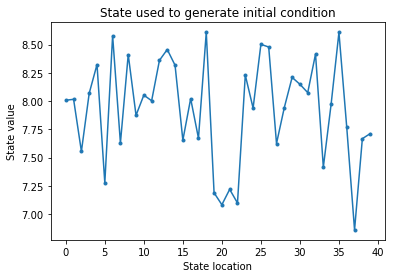

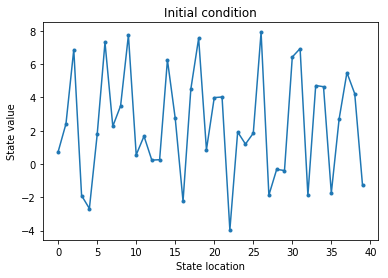

In [7]:
T = 100
dt = 0.05
N = int(T/dt + 1)
t = np.linspace(0, T, N)

initial_x0 = np.ones(N_state) * F + np.random.normal(loc=0, scale=0.5, size=N_state)

plt.figure()
plt.plot(initial_x0, marker='.')
plt.xlabel('State location')
plt.ylabel('State value')
plt.title('State used to generate initial condition')

x = utilities.return_lorenz_96_data(x0=initial_x0, F=F, t=t)

x0 = x[-1]
plt.figure()
plt.plot(x0, marker='.')
plt.xlabel('State location')
plt.ylabel('State value')
plt.title('Initial condition')

# Generate initial ensemble

In [8]:
T = 500
dt = 1
N = int(T/dt + 1)
t = np.linspace(0, T, N)

x = utilities.return_lorenz_96_data(x0=x0, F=F, t=t)

In [9]:
N_ens = 30
random_ints = np.random.choice(
    np.arange(x.shape[0]),
    size=N_ens, replace=False)
X = x[random_ints].T

In [10]:
X.shape

(40, 30)

In [11]:
P_sample = np.cov(X)

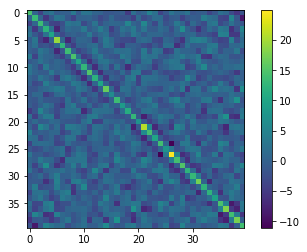

In [12]:
imshow(P_sample)

# Generate historical data

In [13]:
T = 100
t = [0, T]

initial_x0 = np.ones(N_state) * F + np.random.normal(loc=0, scale=0.5, size=N_state)
x = utilities.return_lorenz_96_data(x0=initial_x0, F=F, t=t)

x0 = x[-1]

/home/travis/miniconda3/envs/loc/lib/python3.6/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
T = 10000
dt = 0.01
N = int(T/dt + 1)
t = np.linspace(0, T, N)

x_hist = utilities.return_lorenz_96_data(x0=x0, F=F, t=t)

Text(0.5, 1.0, 'First 1 positions of Truth')

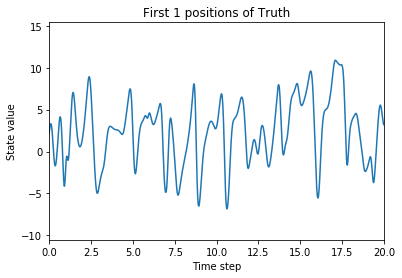

In [15]:
n_positions = 1
t_max = 20
plt.figure()
plt.plot(t,
         x_hist[:, :n_positions],
         marker=None)
#          marker='.')
plt.xlim([0, t_max])
plt.xlabel('Time step')
plt.ylabel('State value')
plt.title(f'First {n_positions} positions of Truth')

In [16]:
T = 100
t = [0, T]

initial_x0_til = np.ones(N_state) * F + np.random.normal(loc=0, scale=0.5, size=N_state)
x_til = utilities.return_lorenz_96_data(x0=initial_x0_til, F=F, t=t)

x0_til = x_til[-1]

In [17]:
T = 10000
dt = 0.01
N = int(T/dt + 1)
t = np.linspace(0, T, N)

x_hist_til = utilities.return_lorenz_96_data(x0=x0_til, F=F, t=t)

Text(0.5, 1.0, 'First 1 positions of estimate')

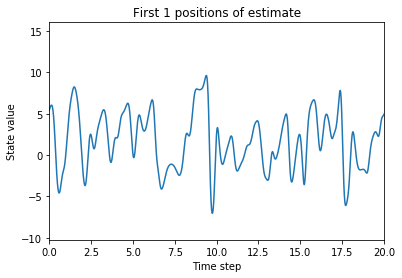

In [18]:
n_positions = 1
t_max = 20
plt.figure()
plt.plot(t,
         x_hist_til[:, :n_positions],
         marker=None)
#          marker='.')
plt.xlim([0, t_max])
plt.xlabel('Time step')
plt.ylabel('State value')
plt.title(f'First {n_positions} positions of estimate')

In [19]:
Error_hist = x_hist - x_hist_til

Text(0.5, 1.0, 'First 1 positions of Error')

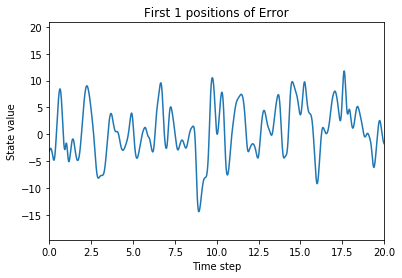

In [20]:
n_positions = 1
t_max = 20
plt.figure()
plt.plot(t,
         Error_hist[:, :n_positions],
         marker=None)
#          marker='.')
plt.xlim([0, t_max])
plt.xlabel('Time step')
plt.ylabel('State value')
plt.title(f'First {n_positions} positions of Error')

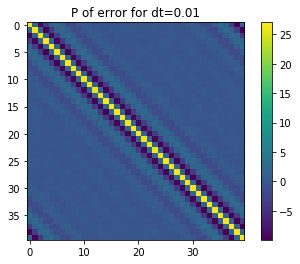

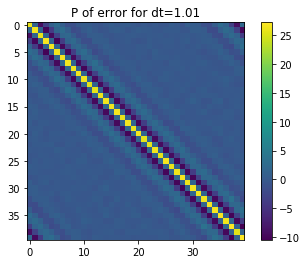

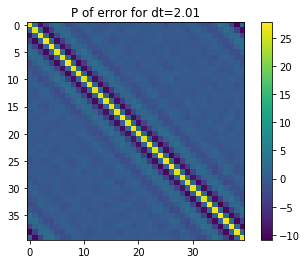

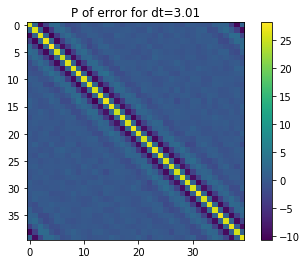

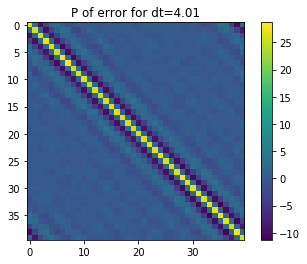

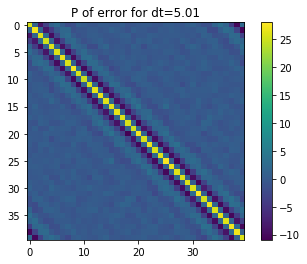

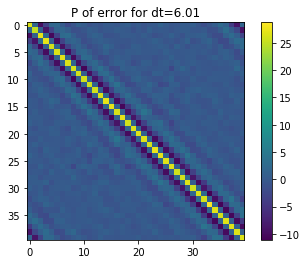

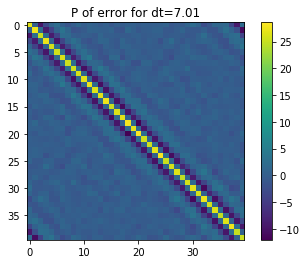

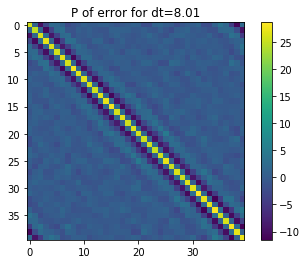

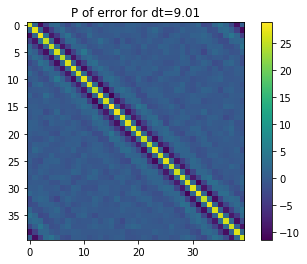

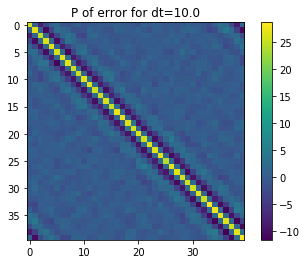

In [21]:
every_array = np.linspace(1, 1001, 10 + 1, dtype=int)
for every in every_array:
    this_P = np.cov(Error_hist[::every].T)
    this_dt = every*dt
    imshow(this_P,
           title=f'P of error for dt={this_dt:0.3}')

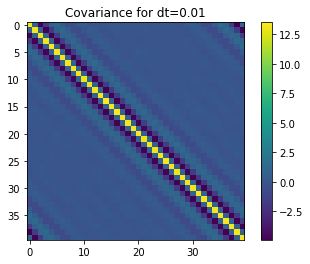

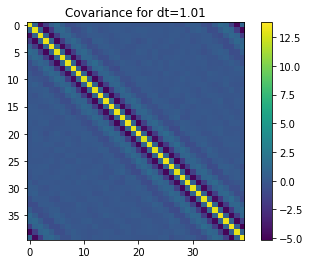

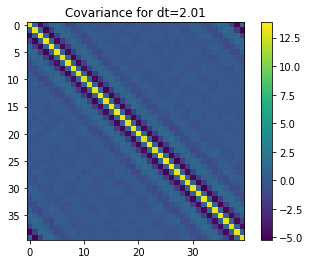

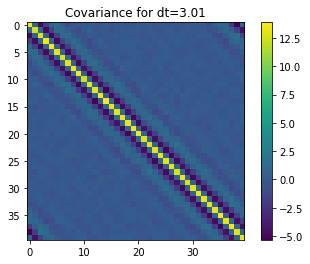

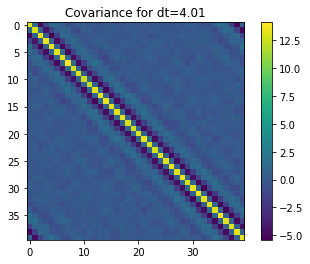

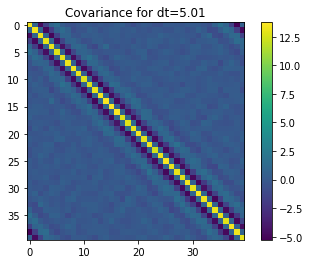

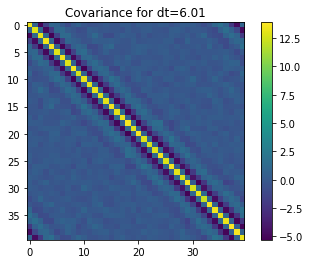

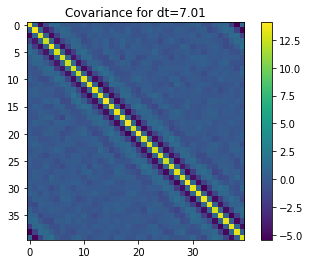

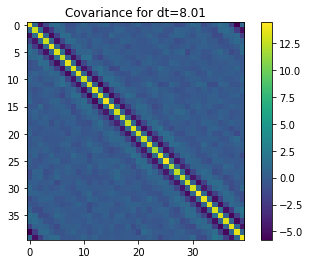

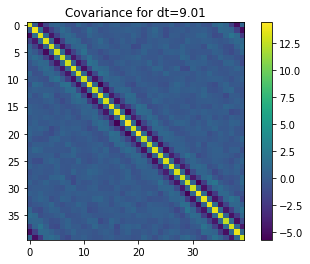

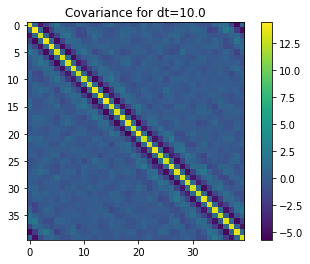

In [22]:
every_array = np.linspace(1, 1001, 10 + 1, dtype=int)
for every in every_array:
    this_P = np.cov(x_hist[::every].T)
    this_dt = every*dt
    imshow(this_P,
           title=f'Covariance for dt={this_dt:0.3}')

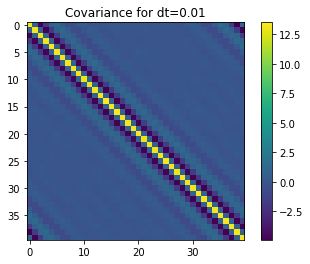

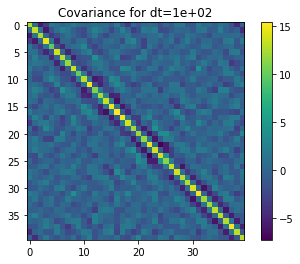

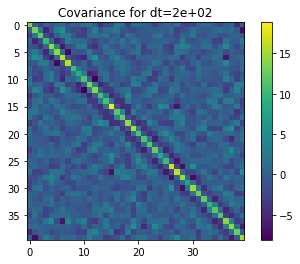

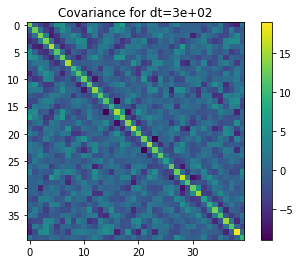

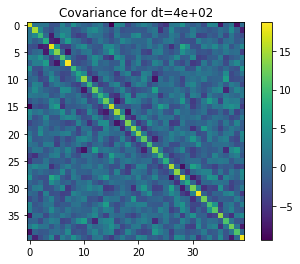

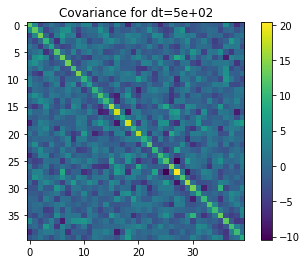

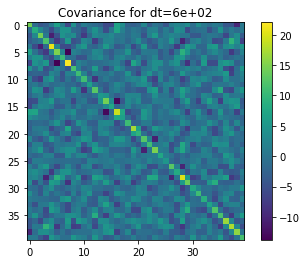

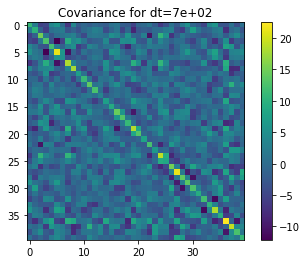

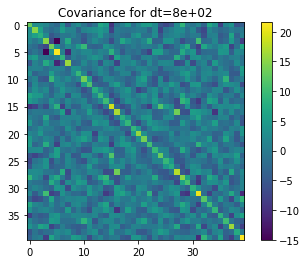

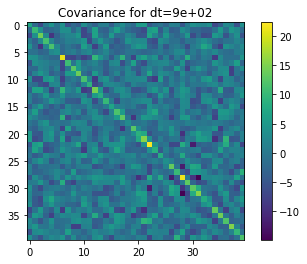

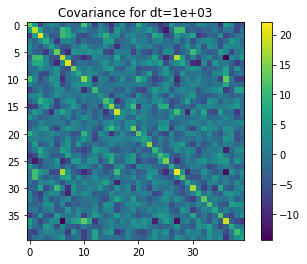

In [23]:
every_array = np.linspace(1, 100001, 10 + 1, dtype=int)
for every in every_array:
    this_P = np.cov(x_hist[::every].T)
    this_dt = every*dt
    imshow(this_P,
           title=f'Covariance for dt={this_dt:0.3}')

In [23]:
x0_pert = x0 + np.random.normal(loc=0, scale=0.5, size=N_state)

In [24]:
T = 10000
dt = 0.01
N = int(T/dt + 1)
t = np.linspace(0, T, N)

x_hist_pert = utilities.return_lorenz_96_data(x0=x0_pert, F=F, t=t)

Text(0.5, 1.0, 'First 1 positions of perturbed ic')

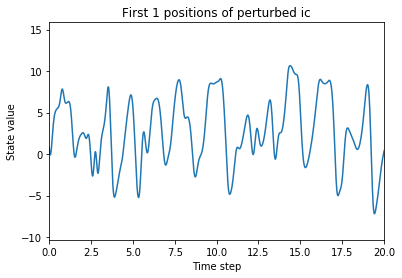

In [25]:
n_positions = 1
t_max = 20
plt.figure()
plt.plot(t,
         x_hist_pert[:, :n_positions],
         marker=None)
#          marker='.')
plt.xlim([0, t_max])
plt.xlabel('Time step')
plt.ylabel('State value')
plt.title(f'First {n_positions} positions of perturbed ic')

In [26]:
Error_hist_pert = x_hist - x_hist_pert

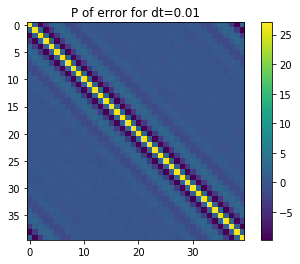

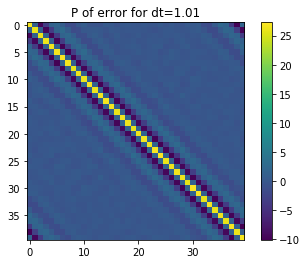

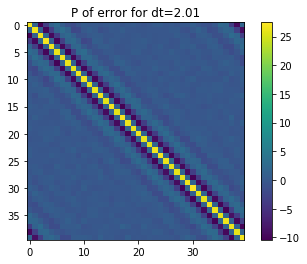

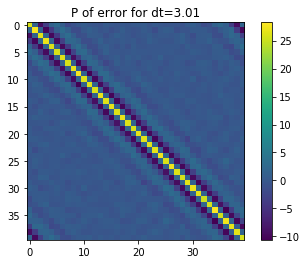

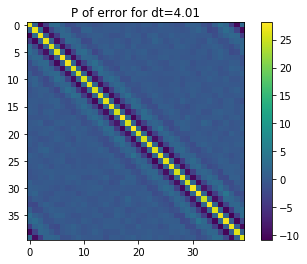

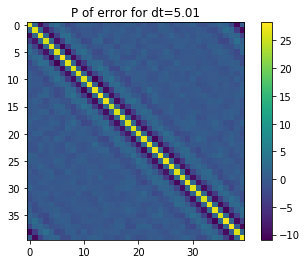

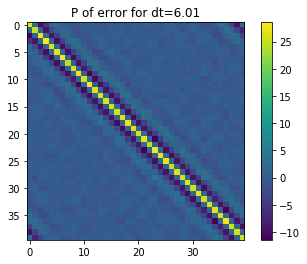

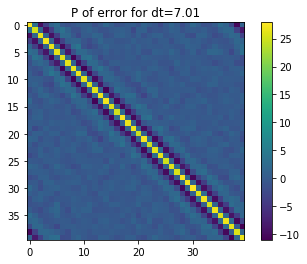

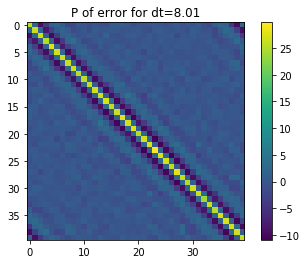

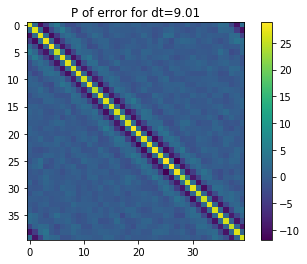

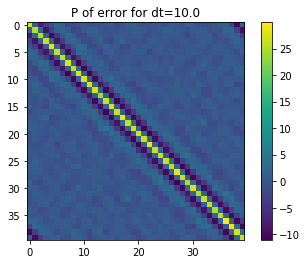

In [27]:
every_array = np.linspace(1, 1001, 10 + 1, dtype=int)
for every in every_array:
    this_P = np.cov(Error_hist_pert[::every].T)
    this_dt = every*dt
    imshow(this_P,
           title=f'P of error for dt={this_dt:0.3}')

# Take B = cov(Error_hist)

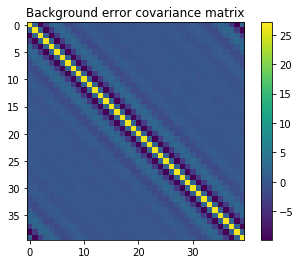

In [64]:
B = np.cov(Error_hist.T)
imshow(B,
       title='Background error covariance matrix')

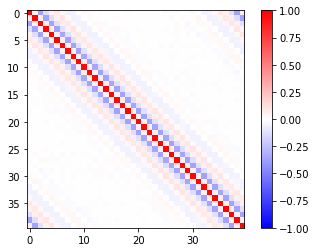

In [65]:
vmax = np.abs(B).max()
imshow(B/B.max(),vmin=-1, vmax=1, cmap='bwr')

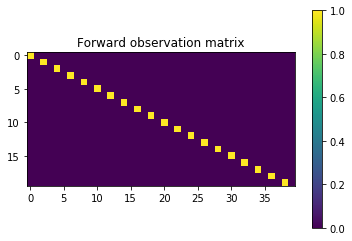

In [66]:
H = np.eye(N_state)
H = H[::2]
imshow(H, 
       title='Forward observation matrix')
N_obs = H.shape[0]

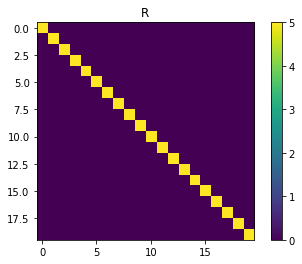

In [67]:
R_sig = 5
R = R_sig * np.eye(N_obs)
imshow(R,
       title='R')
I = np.eye(N_state)

In [68]:
%%latex
\[
    K=QH^{{{\mathrm  {T}}}}\left(HQH^{{{\mathrm  {T}}}}+R\right)^{{-1}}
\]
\[
    \mathbf{P}_{k|k}=(\mathbf{I} -\mathbf{K}_{k}\mathbf{H}_{k})\mathbf{P}_{k|k-1}
\]


<IPython.core.display.Latex object>

In [69]:
dt_assim = 1

In [70]:
K = B @ H.T @ np.linalg.inv(H @ B @ H.T + R)
B2 = (I - K @ H) @ B

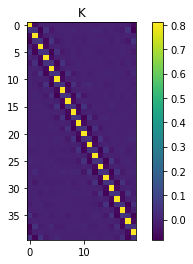

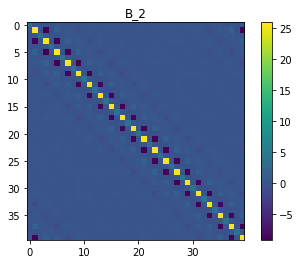

In [71]:
imshow(K,
       title='K')
imshow(B2,
       title='B_2')

In [72]:
this_B = B

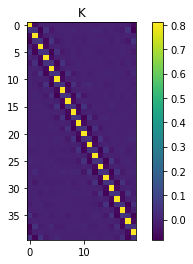

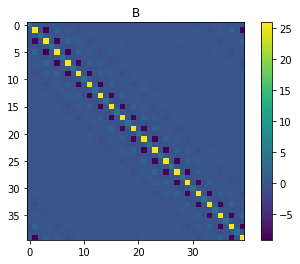

In [73]:
this_K = this_B @ H.T @ np.linalg.inv(H @ this_B @ H.T + R)
this_B = (I - this_K @ H) @ this_B

imshow(this_K,
       title='K')
imshow(this_B,
       title='B')

In [74]:
K2 = B2 @ H.T @ np.linalg.inv(H @ B2 @ H.T + R)
B3 = (I - K2 @ H) @ B2

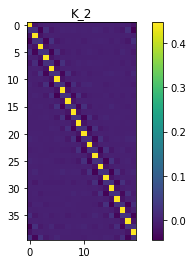

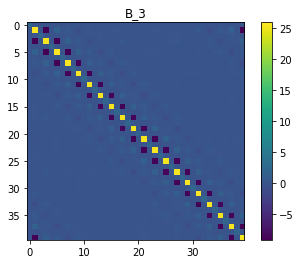

In [75]:
imshow(K2,
       title='K_2')
imshow(B3,
       title='B_3')

# Looking at extended Kalman filter

In [179]:
dt_assim = .2

In [180]:
importlib.reload(utilities)
dM_array = np.ones([N_ens, N_state, N_state])
for ens_num, this_x in enumerate(X.T):  
    dM_array[ens_num] = utilities.return_lorenz_96_TL(this_x, dt_assim)

In [181]:
X_mu = X.mean(axis=1)
dM_mu = utilities.return_lorenz_96_TL(X_mu, dt_assim)

In [182]:
mean_dM = dM_array.mean(axis=0)

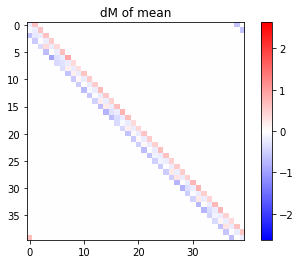

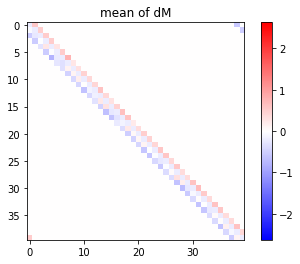

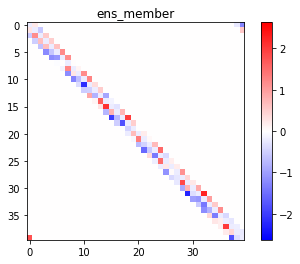

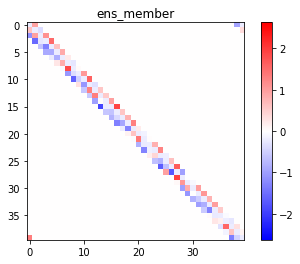

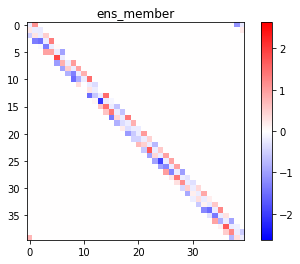

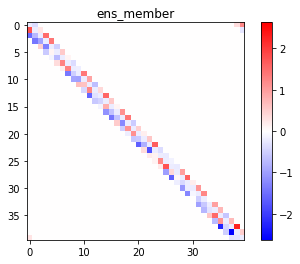

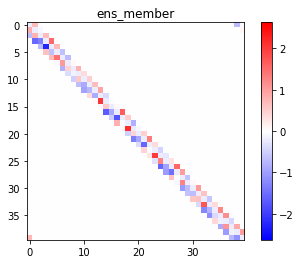

In [183]:
num = 5
vmax = np.max([np.abs(dM_array[:5]).max(),
               np.abs(dM_array.mean(axis=0)).max(),
               np.abs(dM_mu).max()])
imshow(dM_mu,
       vmin=-vmax, vmax=vmax,
       cmap='bwr', title='dM of mean')
imshow(mean_dM,
       vmin=-vmax, vmax=vmax,
       cmap='bwr', title='mean of dM')
for this_dM in dM_array[:5]:
    imshow(this_dM,
           vmin=-vmax, vmax=vmax,
           cmap='bwr', title='ens_member')

In [184]:
B1 = dM_mu @ B @ dM_mu.T

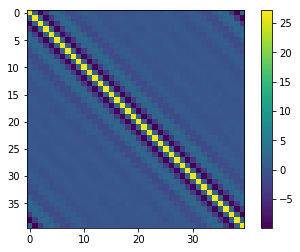

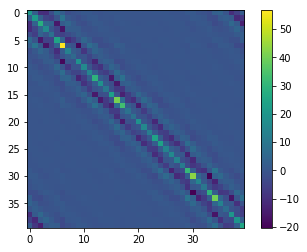

In [185]:
imshow(B)
imshow(B1)

In [186]:
K1 = B1 @ H.T @ np.linalg.inv(H @ B1 @ H.T + R)
B1a = (I - K1 @ H) @ B1

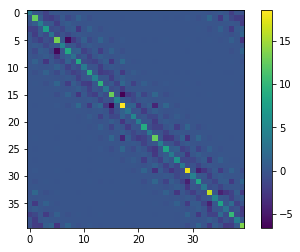

In [187]:
imshow(B1a)

In [190]:
def covariance_update(B, dM, H, R):
    B2 = dM_mu @ B @ dM_mu.T
    K2 = B2 @ H.T @ np.linalg.inv(H @ B2 @ H.T + R)
    B2a = (I - K2 @ H) @ B2
    return K2, B2, B2a

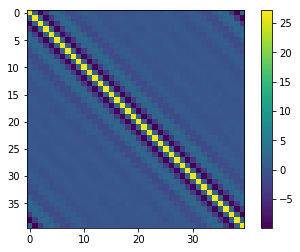

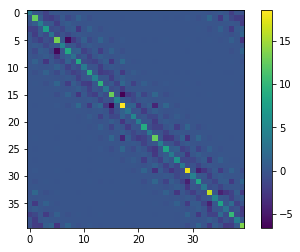

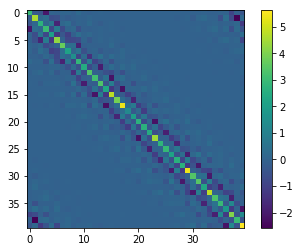

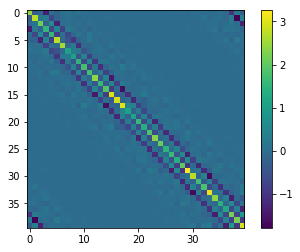

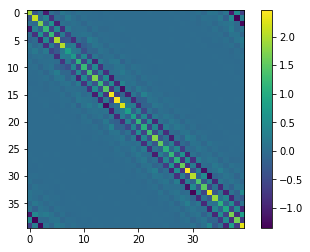

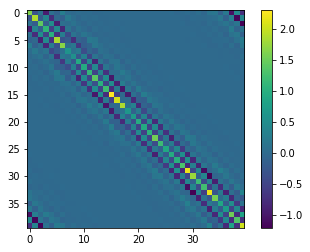

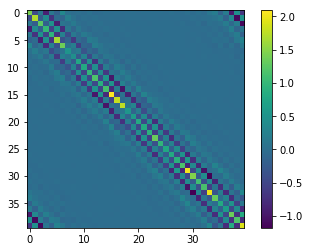

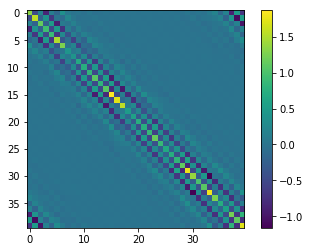

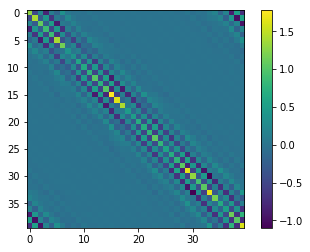

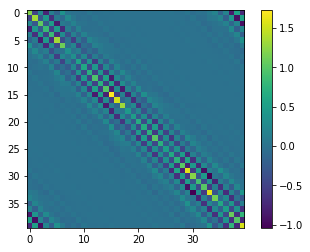

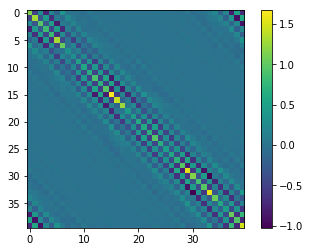

In [193]:
this_B = B
imshow(this_B)
for t in range(10):
    temp, temp, this_B = covariance_update(this_B, dM_mu, H, R)
    imshow(this_B)

In [41]:
def plots(results_dict, plot_num, trial_num=None):
    S = results_dict['trans_mats']['S']
    Tx = results_dict['trans_mats']['Tx']
    Ty = results_dict['trans_mats']['Ty']
    H = results_dict['trans_mats']['H']
    
    rmse = results_dict['rmse']
    ensemble_array = results_dict['ensemble_array']
    ground_truth = results_dict['ground_truth']
    obs_array = results_dict['obs_array']
    if trial_num is None:
        trial_num = rmse.ptp(axis=1).argmax()
    
    rmse_t = (S @ Tx @ ground_truth[:, trial_num][:, None]
              - S @ Tx @ ensemble_array[:, :, trial_num, :].mean(axis=1))**2
    rmse_t = np.sqrt(rmse_t.mean(axis=0))
    
    state_size = H.shape[1]
    obs_size = H.shape[0]
    assim_num = ensemble_array.shape[-1]
    
    
    t_range = np.arange(
        1, assim_num,
        round(assim_num/(plot_num - 2)))
    t_range = np.concatenate([t_range, [assim_num - 1]])
    x_obs = H @ np.arange(state_size)
    
    this_ensemble = ensemble_array[:, :, trial_num, 0]
    this_rmse = rmse[trial_num, 0]
    this_rmse_t = rmse_t[0]
    
    plt.figure()
    plt.plot(rmse.mean(axis=0))
    plt.ylim([0, None])
    plt.title(f'Average RMSE')
    plt.xlabel('Number of iterations')
    plt.ylabel('RMSE')
    
    plt.figure()
    plt.plot(rmse[trial_num])
    plt.ylim([0, None])
    plt.title(f'RMSE for trial: {trial_num}')
    plt.xlabel('Number of iterations')
    plt.ylabel('RMSE')

    plt.figure()
    plt.plot(rmse_t)
    plt.ylim([0, None])
    plt.title('RMSE in Transformed Space')
    plt.xlabel('Number of iterations')
    plt.ylabel('RMSE')
    
    
    plt.figure()
    plt.plot(ground_truth[:, trial_num], '--')
    plt.plot(
        this_ensemble.mean(axis=1),
        '-')
    plt.legend(['x', 'x ens mean', 'y'])
    plt.title(f'In real space: 0'
              + f'; rmse: {this_rmse:0.5}')
    
    plt.figure()
    plt.plot(S @ Tx @ ground_truth[:, trial_num], '--')
    plt.plot(S @ Tx @ this_ensemble.mean(axis=1), '-')
    plt.legend(['trans truth',
                'trans ens mean', 'trans obs'])
    plt.title(f'In transformed space: 0'
              + f'; rmse: {this_rmse_t:0.5}')
    
    for t in t_range:
        this_ensemble = ensemble_array[:, :, trial_num, t]
        this_obs = obs_array[:, trial_num, t - 1]
        this_rmse = rmse[trial_num, t]
        this_rmse_t = rmse_t[t]
        
        plt.figure()
        plt.plot(ground_truth[:, trial_num], '--')
        plt.plot(this_ensemble.mean(axis=1), '-')        
        plt.scatter(x_obs,
                    this_obs, marker='.')
        plt.legend(['truth', 'ens mean', 'obs'])
        plt.title(f'In real space: {t}'
                  + f'; rmse: {this_rmse:0.5}')
        
        plt.figure()
        plt.plot(S @ Tx @ ground_truth[:, trial_num], '--')
        plt.plot(S @ Tx @ this_ensemble.mean(axis=1), '-')
        plt.scatter(np.arange(obs_size),
                    Ty @ this_obs, marker='.')
        plt.legend(['trans truth',
                    'trans ens mean', 'trans obs'])
        plt.title(
            f'In transformed space: {t}'
            + f'; rmse: {this_rmse_t:0.5}')

In [42]:
dimension = 100
rho0_l = 50
rho0_s = .001
dx = 1
obs_every = 2
H = np.eye(dimension)[::obs_every]
y_size = H.shape[0]

rho = np.arange(dimension, dtype=float)
rho = np.minimum(rho, (dimension - rho) % dimension)
rho = rho*dx

In [43]:
eig_val_l, eig_vec_l, P_l, sort_index = covariance.generate_circulant(
    dimension, dx, rho0_l, covariance.fft_exp_1d,
    return_Corr=True, return_sort_ind=True)
print('long variance: ', eig_val_l.mean())
eig_val_l = eig_val_l / eig_val_l.mean()
sort_index = np.argsort(sort_index)
eig_val_l = eig_val_l[sort_index]
eig_vec_l = eig_vec_l[:, sort_index]
P_l = eig_vec_l @ np.diag(eig_val_l) @ eig_vec_l.conj().T
P_l = P_l.real

eig_val_s, eig_vec_s, P_s, sort_index = covariance.generate_circulant(
    dimension, dx, rho0_s, covariance.fft_exp_1d,
    return_Corr=True, return_sort_ind=True)
print('short variance: ', eig_val_s.mean())
eig_val_s = eig_val_s / eig_val_s.mean()
sort_index = np.argsort(sort_index)
eig_val_s = eig_val_s[sort_index]
eig_vec_s = eig_vec_s[:, sort_index]
P_s = eig_vec_s @ np.diag(eig_val_s) @ eig_vec_s.conj().T
P_s = P_s.real
#P_s = P_s/P_s.max()

al = 0.8
eig_val = (1 - al) * eig_val_s + al * eig_val_l
eig_vec = eig_vec_l.copy()

eig_val = eig_val / eig_val.mean()

sort_index = np.argsort(eig_val)[::-1]
eig_val = eig_val[sort_index]
eig_vec = eig_vec[:, sort_index]

P = eig_vec @ np.diag(eig_val) @ eig_vec.conj().T
P = P.real

sort_index = np.argsort(eig_val_l)[::-1]
eig_val_l = eig_val_l[sort_index]
eig_vec_l = eig_vec_l[:, sort_index]

sort_index = np.argsort(eig_val_s)[::-1]
eig_val_s = eig_val_s[sort_index]
eig_vec_s = eig_vec_s[:, sort_index]


R = np.eye(y_size)

trans_mats_true = assimilate.transformation_matrices(
    H, eig_val_p=eig_val, eig_vec_p=eig_vec,
    R=R, return_Ts=True)


trans_mats_long = assimilate.transformation_matrices(
    H, eig_val_p=eig_val_l, eig_vec_p=eig_vec_l,
    R=R, return_Ts=True)


trans_mats_short = assimilate.transformation_matrices(
    H, eig_val_p=eig_val_s, eig_vec_p=eig_vec_s,
    R=R, return_Ts=True)


for key, val in trans_mats_true.items():
    exec(key + '=val')
for key, val in trans_mats_long.items():
    exec(key+'_l' + '=val')
for key, val in trans_mats_short.items():
    exec(key+'_s' + '=val')

long variance:  1.3089822227578936
short variance:  0.001999993418986775


<IPython.core.display.Javascript object>


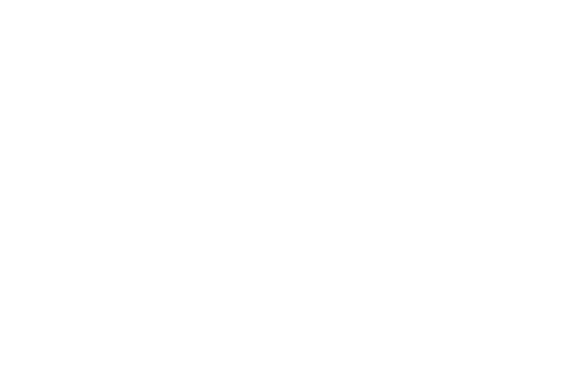

<IPython.core.display.Javascript object>


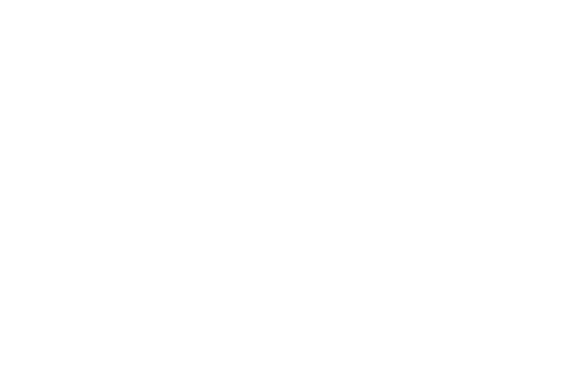

<IPython.core.display.Javascript object>


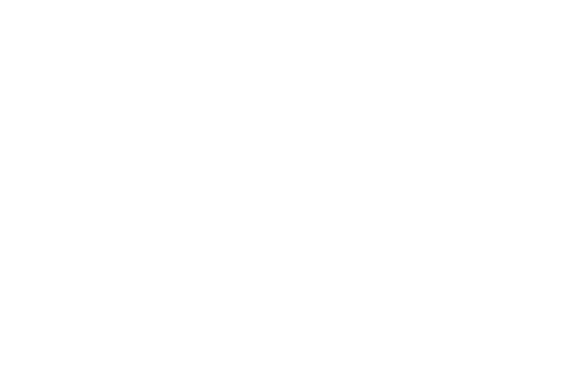

<IPython.core.display.Javascript object>


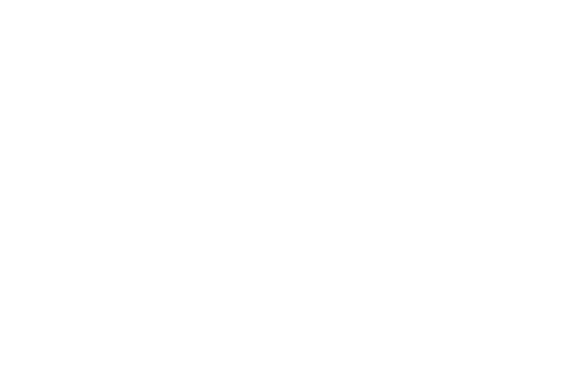

<IPython.core.display.Javascript object>


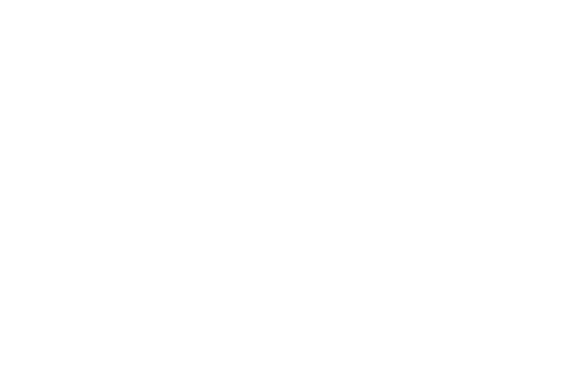

Log10(condition):  2.481202588844693


<IPython.core.display.Javascript object>


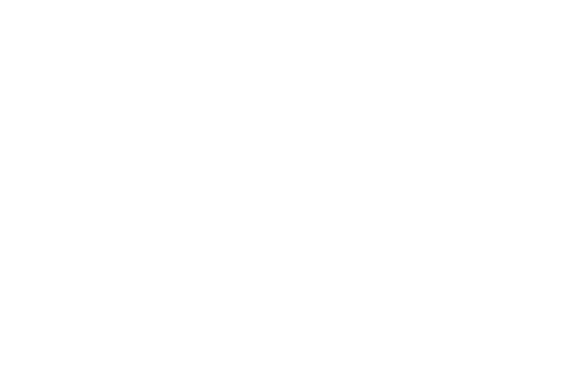

<IPython.core.display.Javascript object>


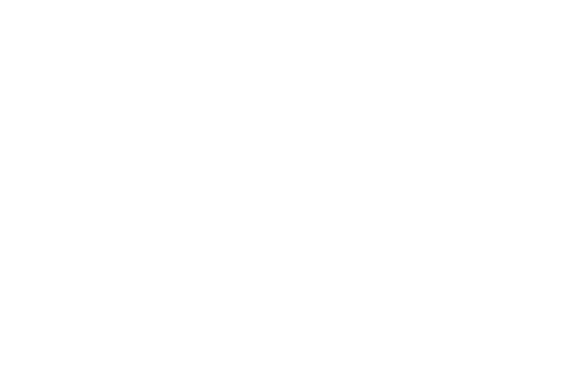

<IPython.core.display.Javascript object>


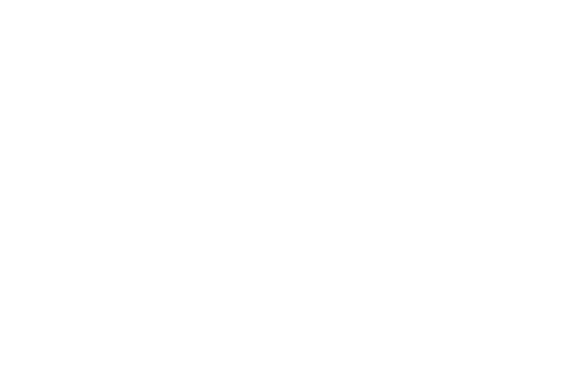

Text(0.5, 0.98, 'Eigenvalues P_s')

<IPython.core.display.Javascript object>


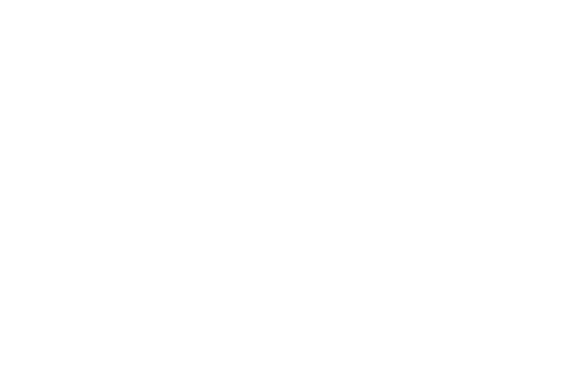

<IPython.core.display.Javascript object>


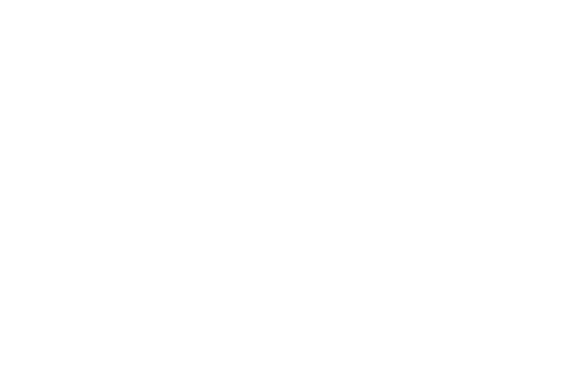

<IPython.core.display.Javascript object>


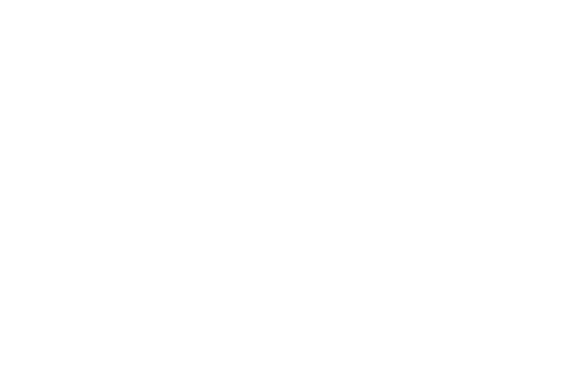

<IPython.core.display.Javascript object>


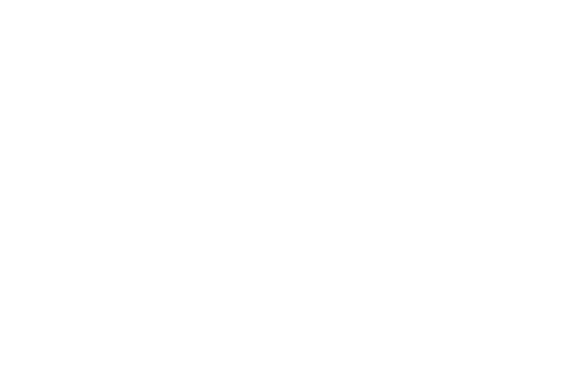

<IPython.core.display.Javascript object>


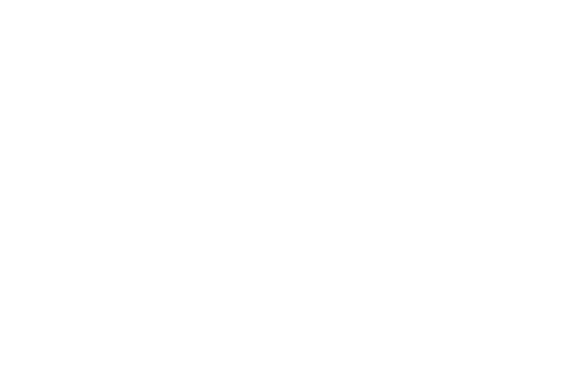

<IPython.core.display.Javascript object>


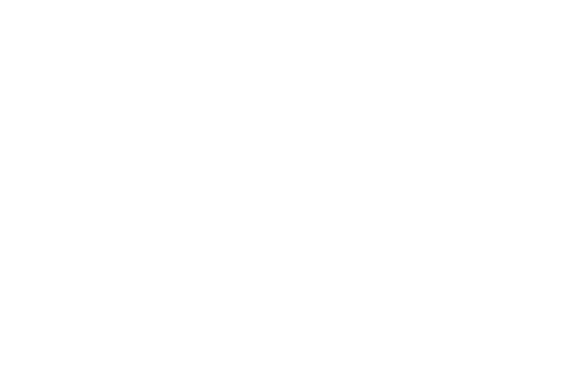

<IPython.core.display.Javascript object>


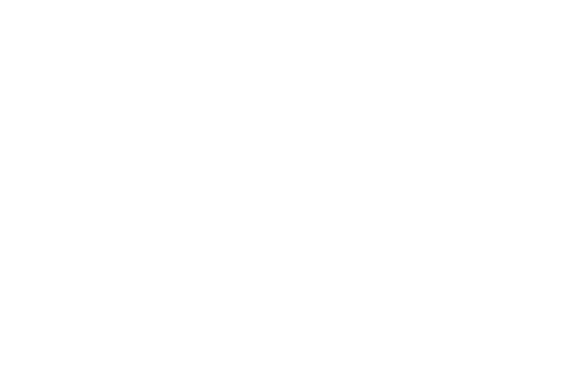

<IPython.core.display.Javascript object>


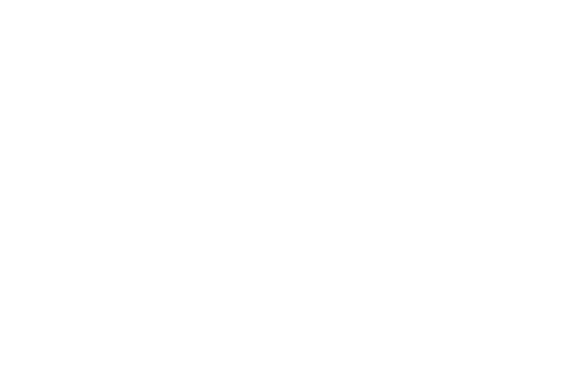

In [44]:
imshow(P, title='Covariance matrix', vmin=0, vmax=1)
imshow(P_l, title=f'Long corrilation: {rho0_l}', vmin=0, vmax=1)
imshow(P_s, title=f'Short corrilation: {rho0_s}', vmin=0, vmax=1)

error_l = P_l - P
error_s = P_s - P

vmax = np.max([np.abs(error_l).max(),
               np.abs(error_s).max()])

imshow(error_l, title=f'Long difference: {rho0_l}',
       vmin=-vmax, vmax=vmax, cmap='bwr')
imshow(error_s, title=f'Short difference: {rho0_s}',
       vmin=-vmax, vmax=vmax, cmap='bwr')
print('Log10(condition): ',
      np.log10(np.linalg.cond(P)))

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val)
ax[1].semilogy(eig_val)
plt.suptitle('Eigenvalues P')

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val_l)
ax[1].semilogy(eig_val_l)
plt.suptitle('Eigenvalues P_l')

fig, ax = plt.subplots(1, 2)
ax[0].plot(eig_val_s)
ax[1].semilogy(eig_val_s)
plt.suptitle('Eigenvalues P_s')

In [45]:
ens_size = 50
assim_num = 20
trial_num = 200
mu = np.zeros(dimension)
obs_size = H.shape[0]

In [46]:
ground_truth = assimilate.generate_ensemble(
    trial_num, mu, trans_mats_true['P_sqrt'])
obs_array = (
    (H @ ground_truth)[:, :, None]
     + np.einsum(
         'ij, jk... ->ik...', R_sqrt,
         np.random.randn(obs_size, trial_num,
                         assim_num)))
ensemble_array = np.ones(
    [dimension, ens_size, trial_num,
     assim_num + 1]) * np.nan
for t_num in range(trial_num):
    ensemble_array[:, :, t_num, 0] = (
        assimilate.generate_ensemble(
            ens_size, mu, trans_mats_true['P_sqrt']))

In [47]:
importlib.reload(assimilate)
results_dict = assimilate.trans_assim_trials(
    mu=mu, H=H, ens_size=ens_size, assim_num=assim_num,
    trial_num=trial_num,
    true_mats=trans_mats_true,
    trans_mats=trans_mats_true, 
    ground_truth=ground_truth,
    obs_array=obs_array,
    ensemble_array=ensemble_array)
rmse_full = results_dict['rmse']

<IPython.core.display.Javascript object>


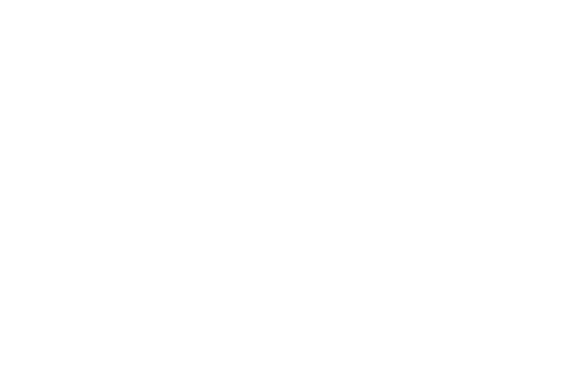

<IPython.core.display.Javascript object>


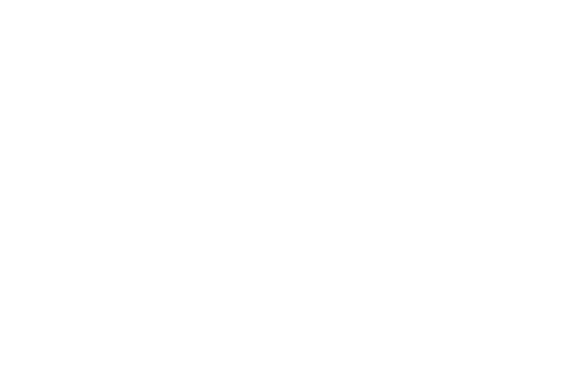

<IPython.core.display.Javascript object>


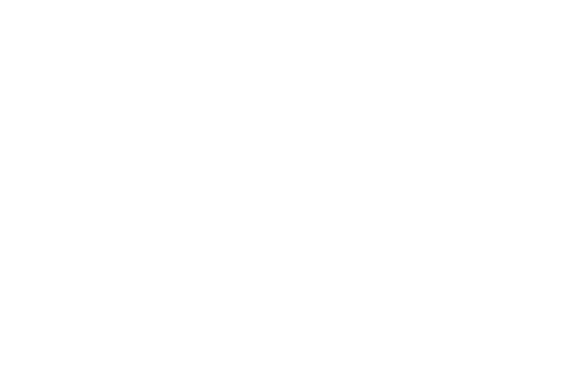

<IPython.core.display.Javascript object>


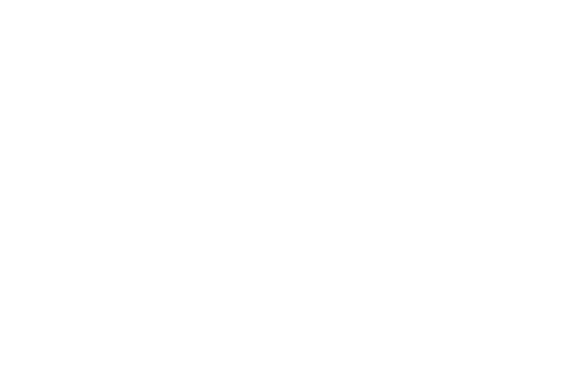

<IPython.core.display.Javascript object>


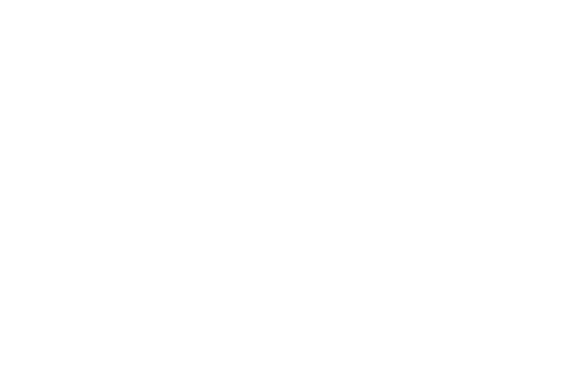

<IPython.core.display.Javascript object>


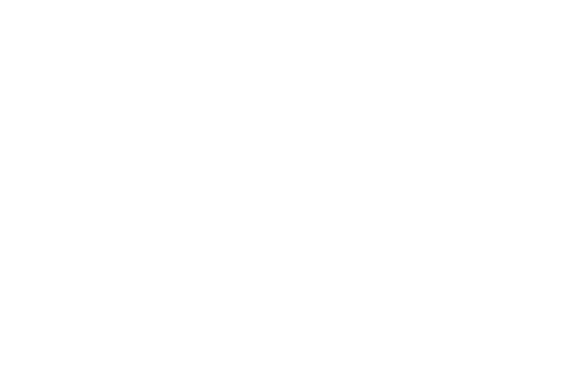

<IPython.core.display.Javascript object>


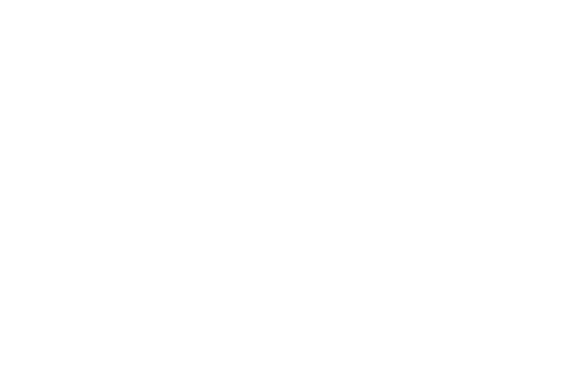

<IPython.core.display.Javascript object>


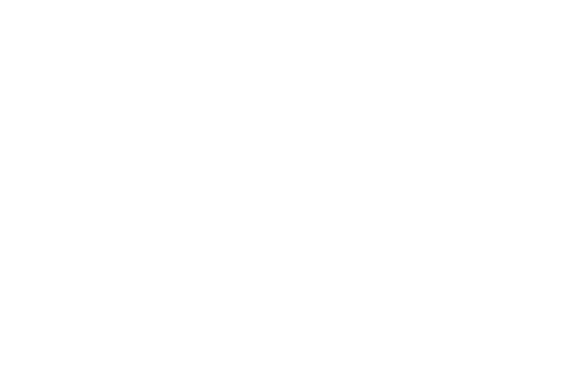

<IPython.core.display.Javascript object>


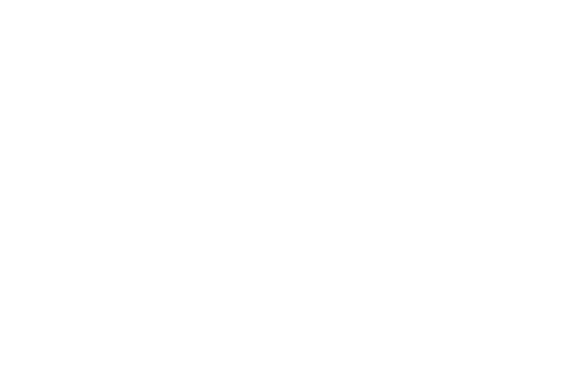

<IPython.core.display.Javascript object>


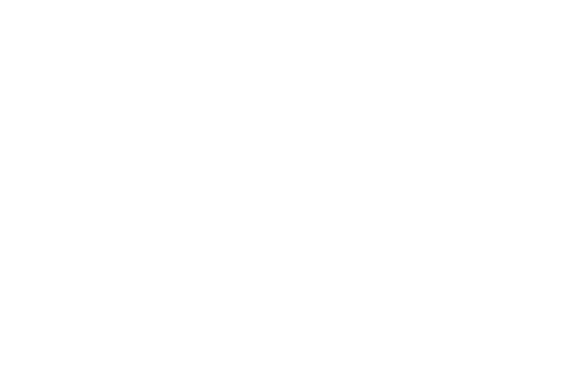

<IPython.core.display.Javascript object>


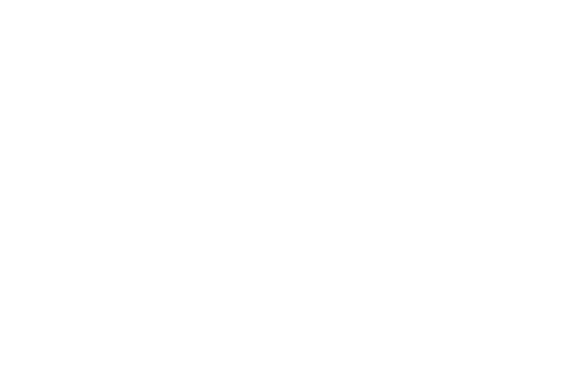

<IPython.core.display.Javascript object>


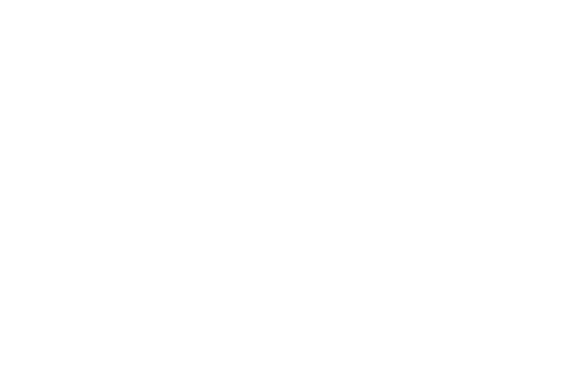

<IPython.core.display.Javascript object>


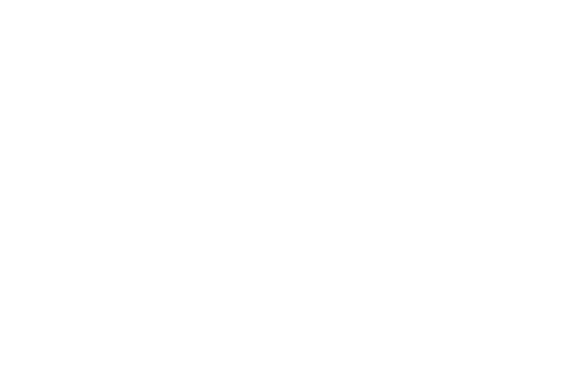

<IPython.core.display.Javascript object>


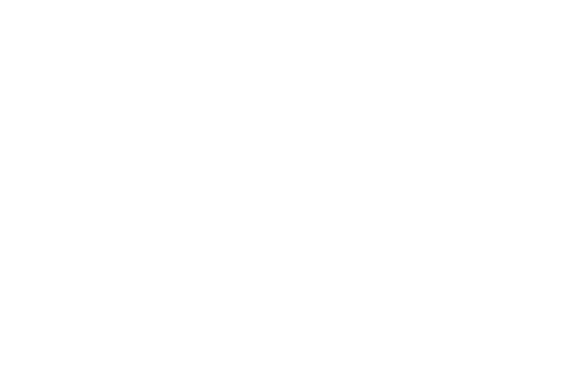

<IPython.core.display.Javascript object>


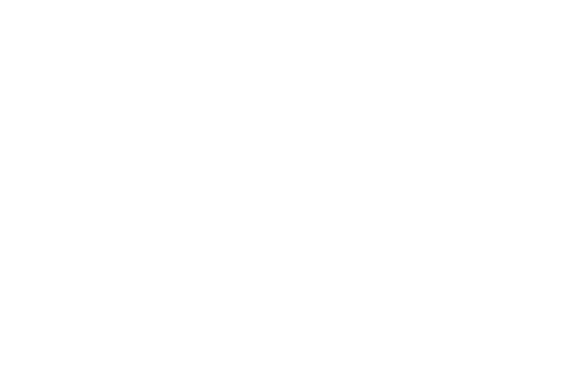

<IPython.core.display.Javascript object>


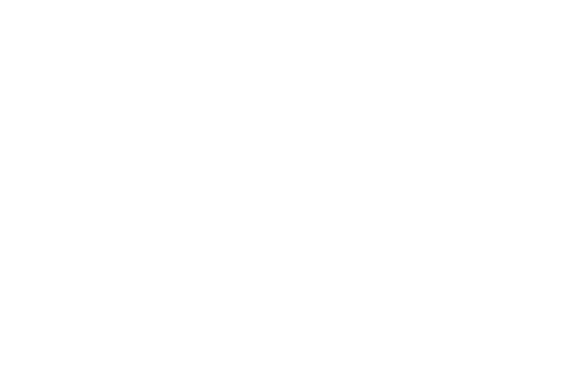

<IPython.core.display.Javascript object>


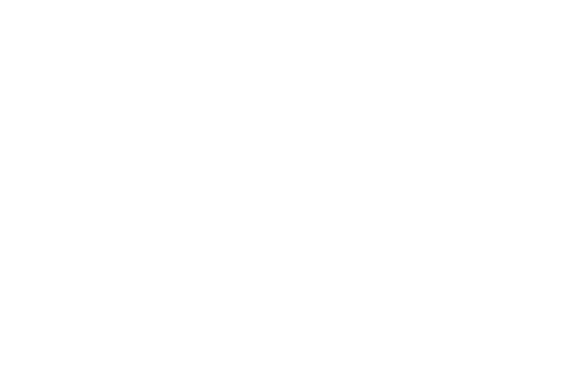

<IPython.core.display.Javascript object>


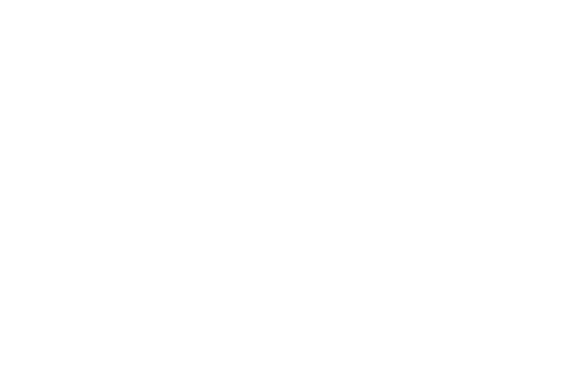

<IPython.core.display.Javascript object>


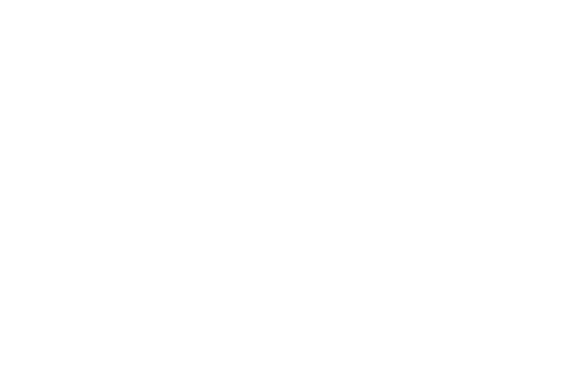

<IPython.core.display.Javascript object>


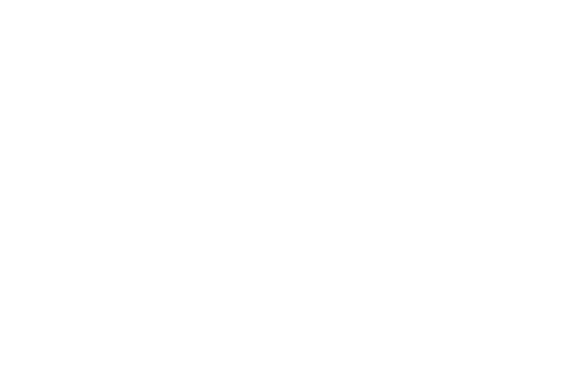

<IPython.core.display.Javascript object>


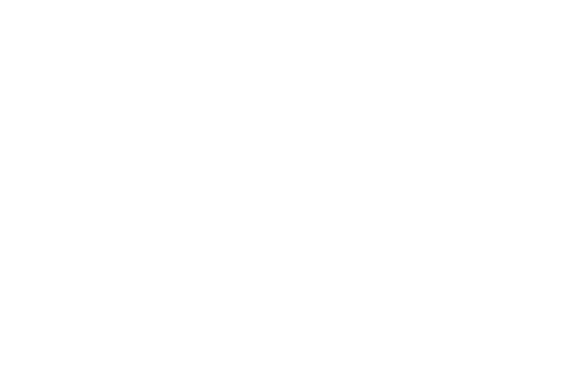

<IPython.core.display.Javascript object>


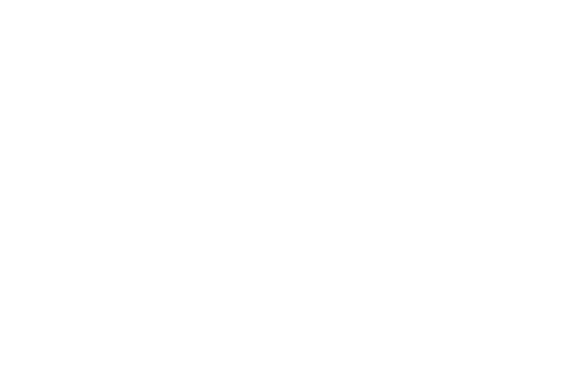

<IPython.core.display.Javascript object>


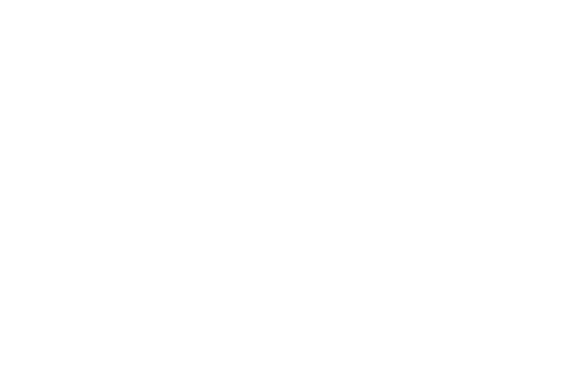

<IPython.core.display.Javascript object>


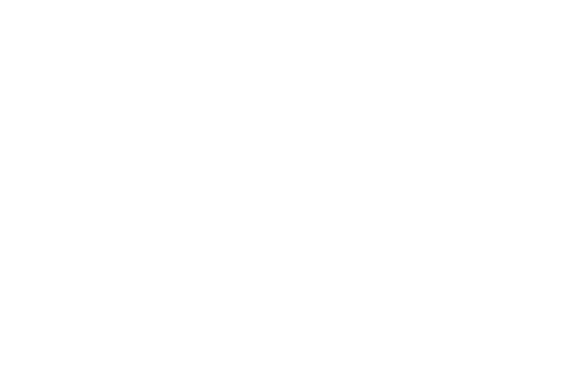

<IPython.core.display.Javascript object>


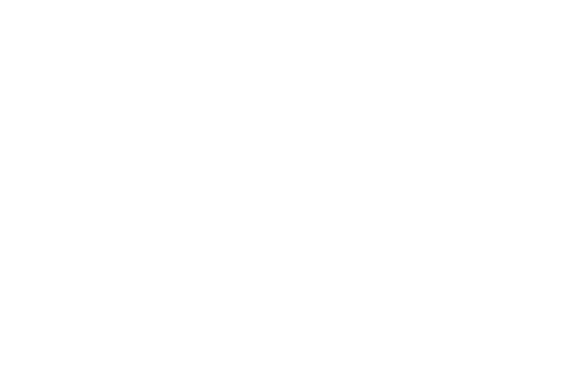

<IPython.core.display.Javascript object>


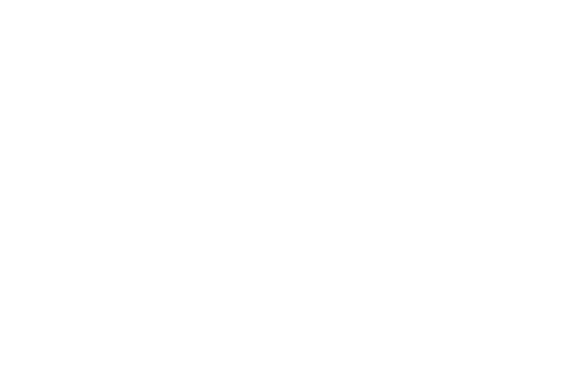

In [48]:
plots(results_dict, 5)

In [49]:
importlib.reload(assimilate)
results_dict = assimilate.trans_assim_trials(
    mu=mu, H=H, ens_size=ens_size, assim_num=assim_num,
    trial_num=trial_num,
    true_mats=trans_mats_true,
    trans_mats=trans_mats_long, 
    ground_truth=ground_truth,
    obs_array=obs_array,
    ensemble_array=ensemble_array)
rmse_l = results_dict['rmse']

Long


<IPython.core.display.Javascript object>


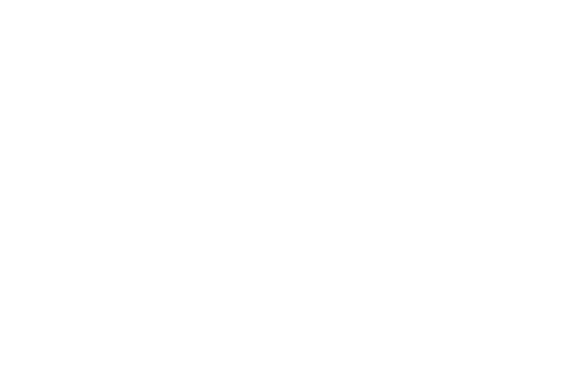

<IPython.core.display.Javascript object>


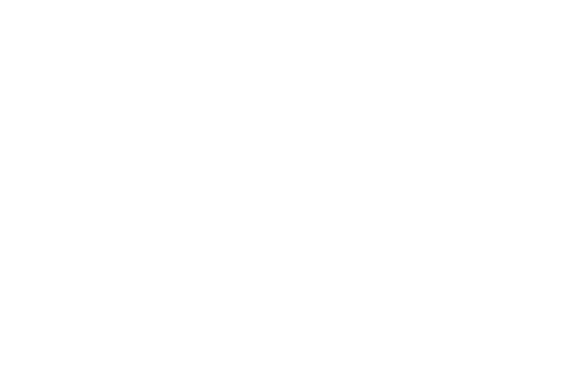

<IPython.core.display.Javascript object>


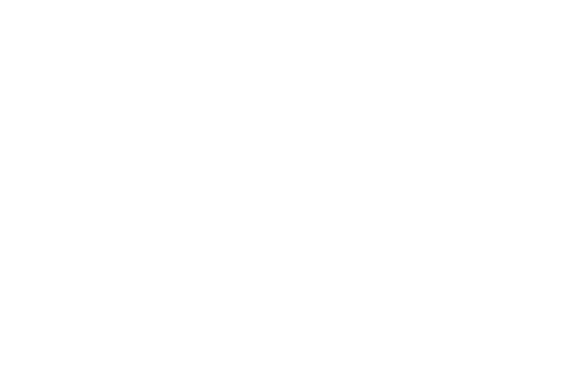

<IPython.core.display.Javascript object>


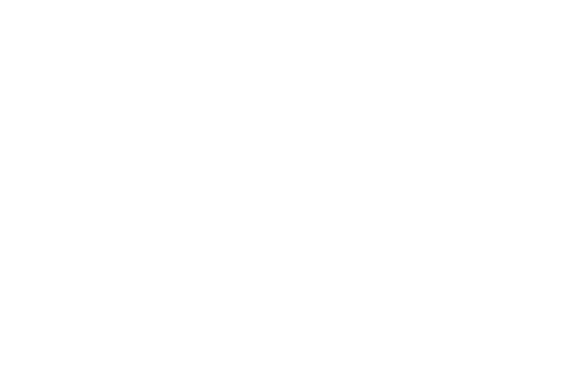

<IPython.core.display.Javascript object>


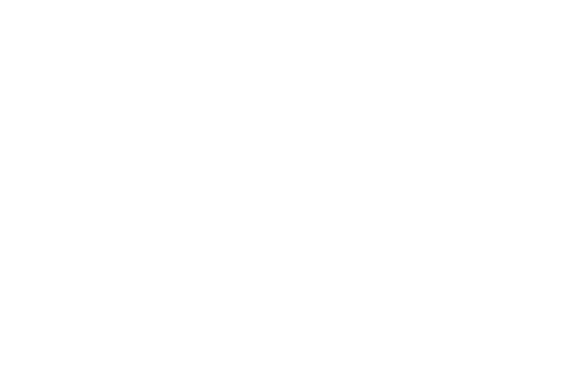

<IPython.core.display.Javascript object>


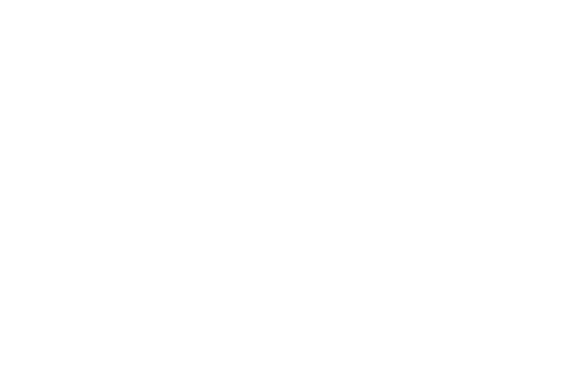

<IPython.core.display.Javascript object>


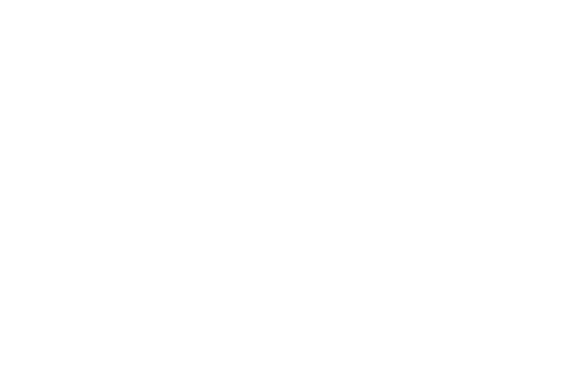

<IPython.core.display.Javascript object>


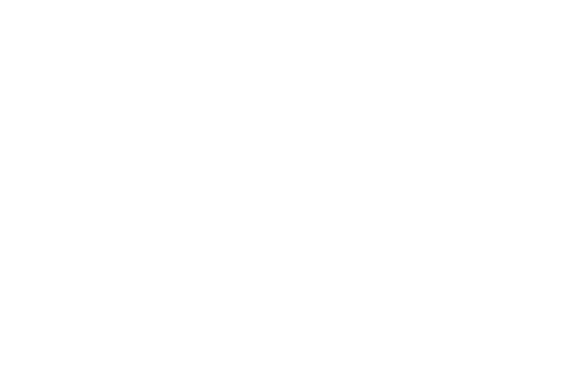

<IPython.core.display.Javascript object>


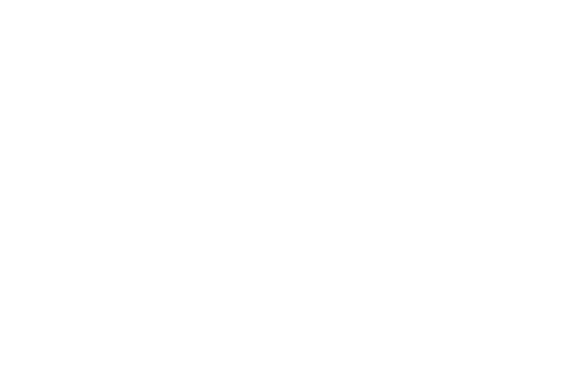

<IPython.core.display.Javascript object>


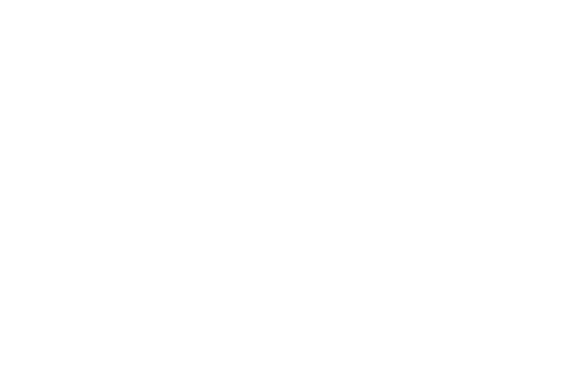

<IPython.core.display.Javascript object>


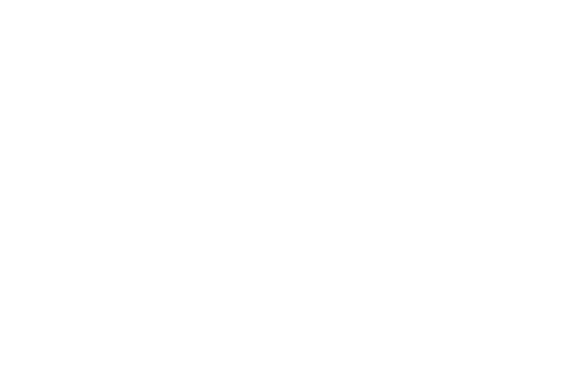

<IPython.core.display.Javascript object>


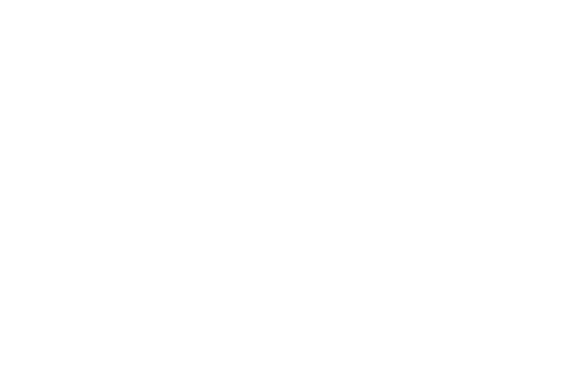

<IPython.core.display.Javascript object>


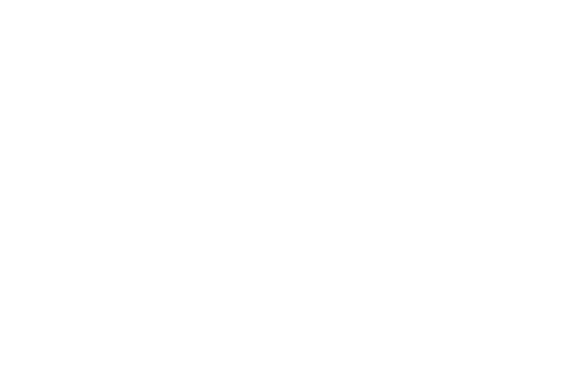

<IPython.core.display.Javascript object>


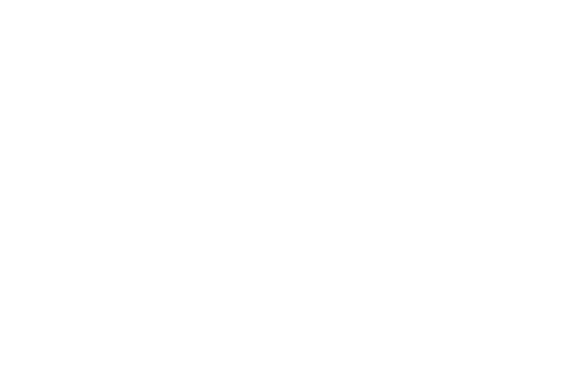

<IPython.core.display.Javascript object>


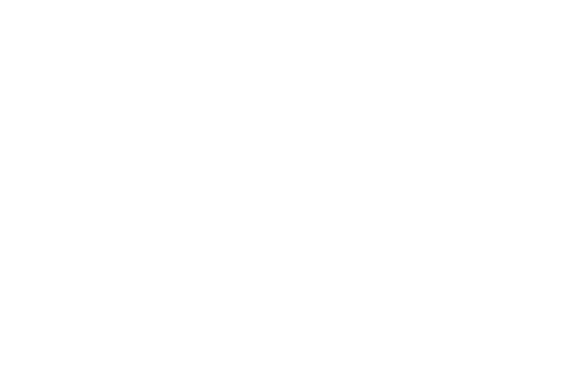

<IPython.core.display.Javascript object>


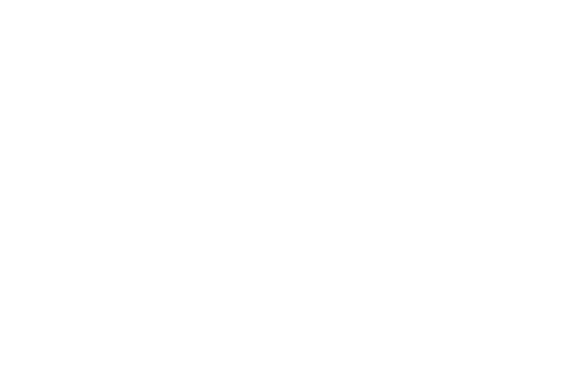

<IPython.core.display.Javascript object>


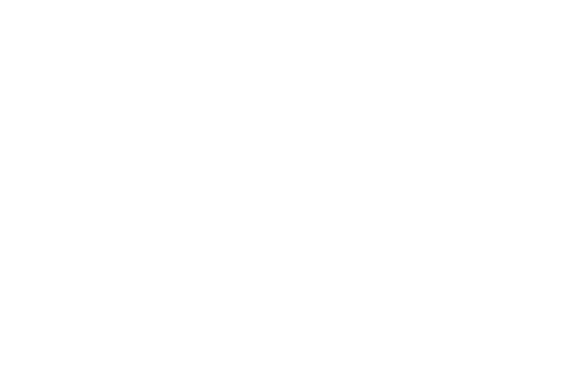

<IPython.core.display.Javascript object>


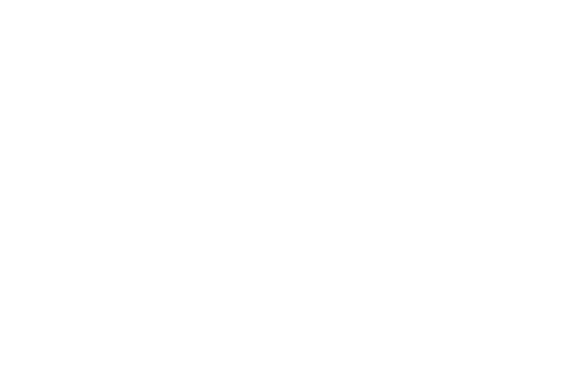

<IPython.core.display.Javascript object>


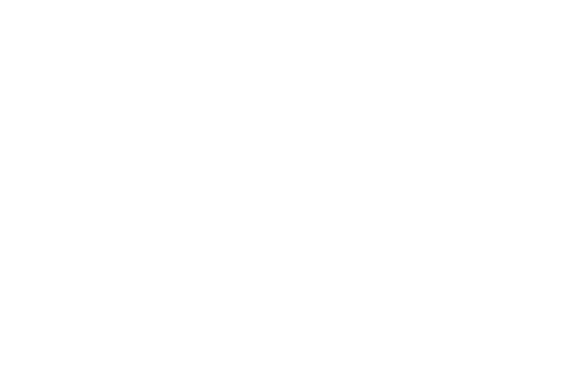

<IPython.core.display.Javascript object>


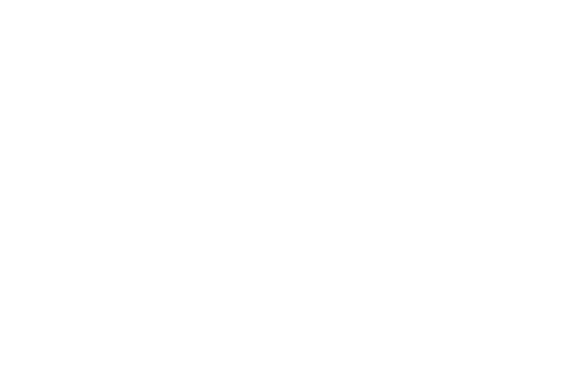

<IPython.core.display.Javascript object>


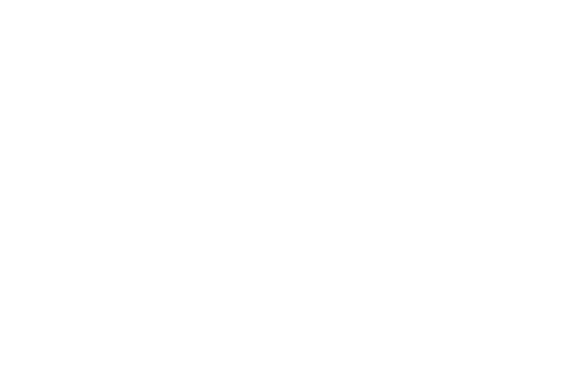

<IPython.core.display.Javascript object>


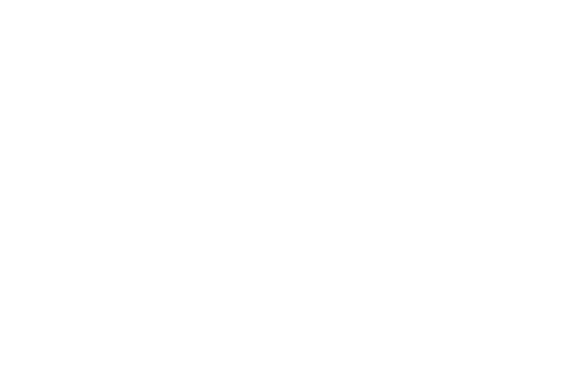

<IPython.core.display.Javascript object>


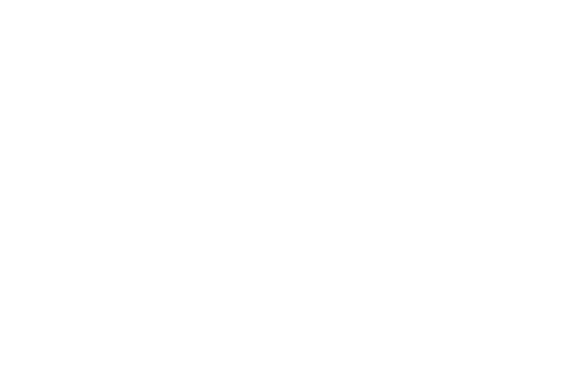

<IPython.core.display.Javascript object>


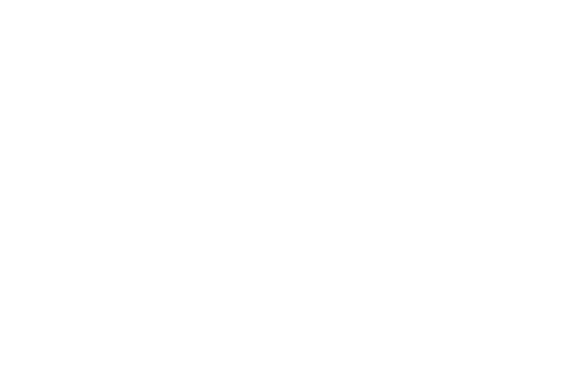

<IPython.core.display.Javascript object>


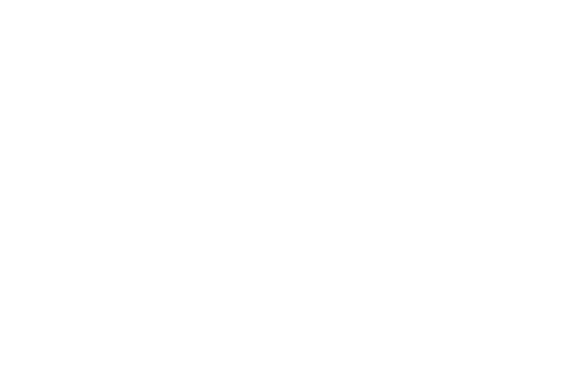

<IPython.core.display.Javascript object>


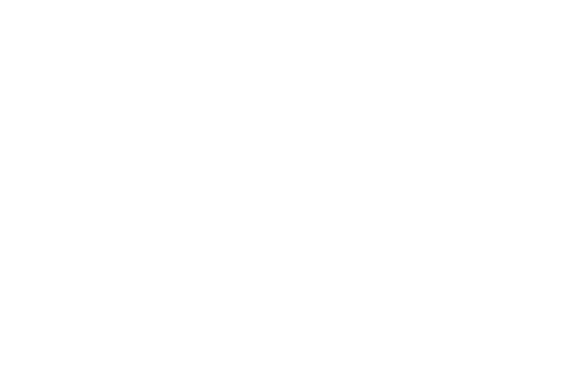

In [50]:
print('Long')
plots(results_dict, 5)

In [51]:
importlib.reload(assimilate)
results_dict = assimilate.trans_assim_trials(
    mu=mu, H=H, ens_size=ens_size, assim_num=assim_num,
    trial_num=trial_num,
    true_mats=trans_mats_true,
    trans_mats=trans_mats_short, 
    ground_truth=ground_truth,
    obs_array=obs_array,
    ensemble_array=ensemble_array)
rmse_s = results_dict['rmse']

Short


<IPython.core.display.Javascript object>


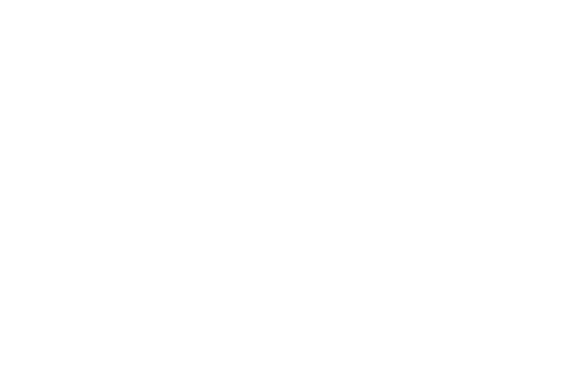

<IPython.core.display.Javascript object>


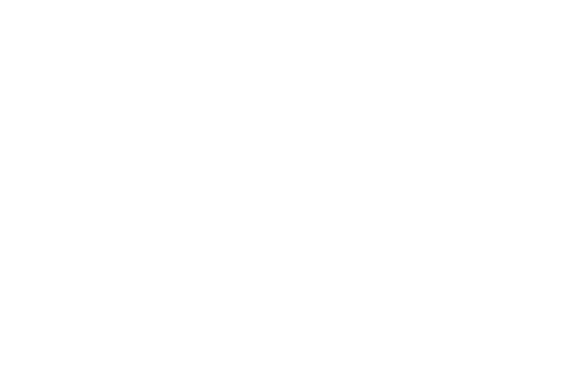

<IPython.core.display.Javascript object>


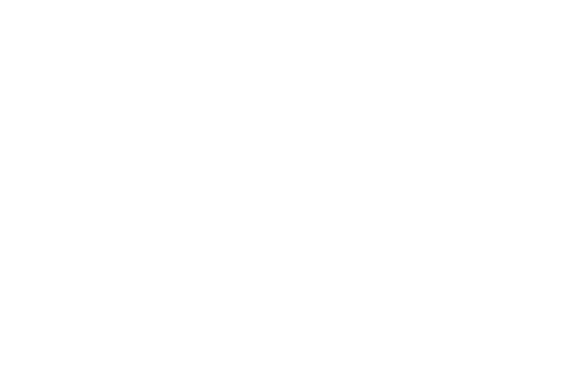

<IPython.core.display.Javascript object>


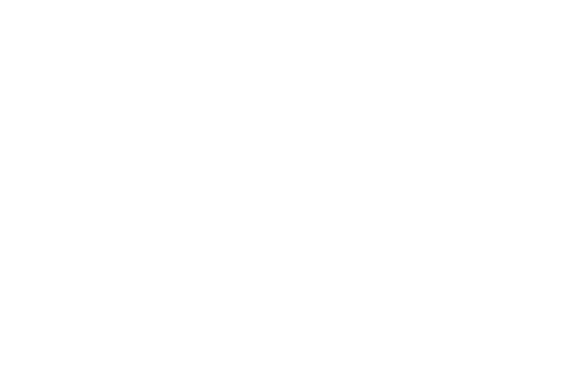

<IPython.core.display.Javascript object>


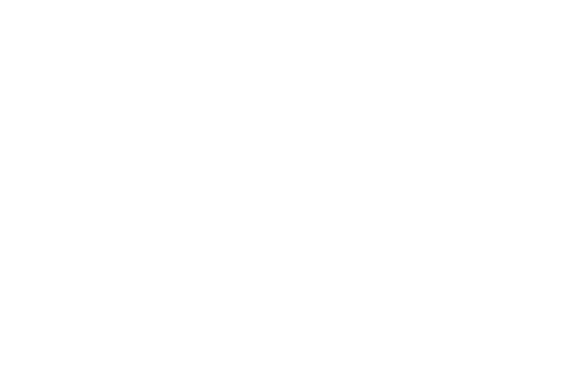

<IPython.core.display.Javascript object>


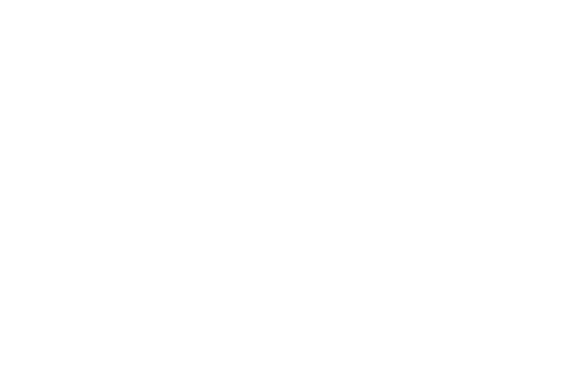

<IPython.core.display.Javascript object>


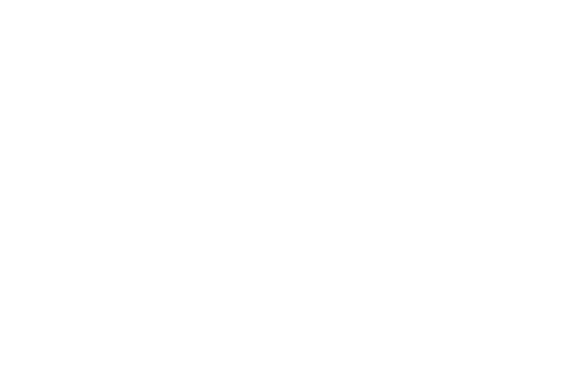

<IPython.core.display.Javascript object>


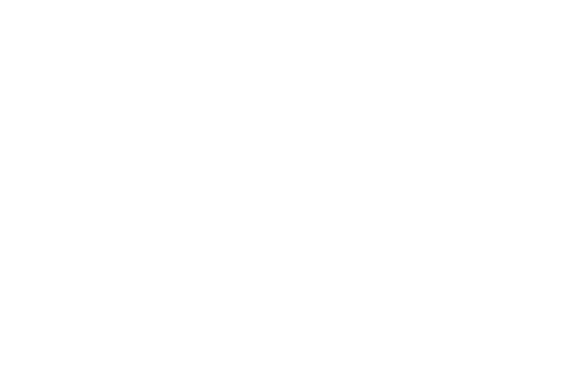

<IPython.core.display.Javascript object>


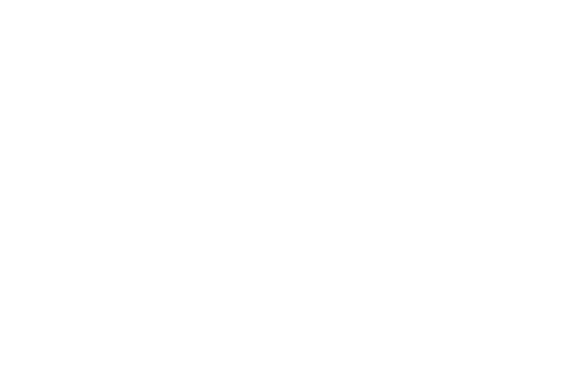

<IPython.core.display.Javascript object>


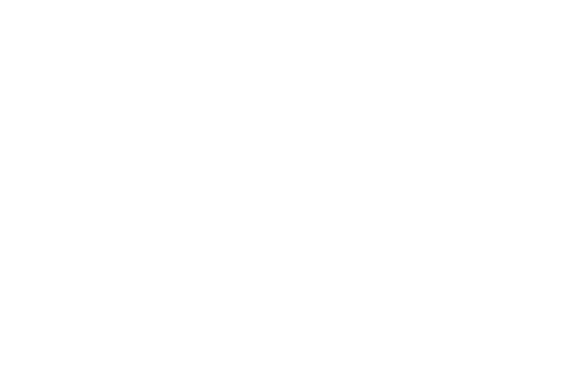

<IPython.core.display.Javascript object>


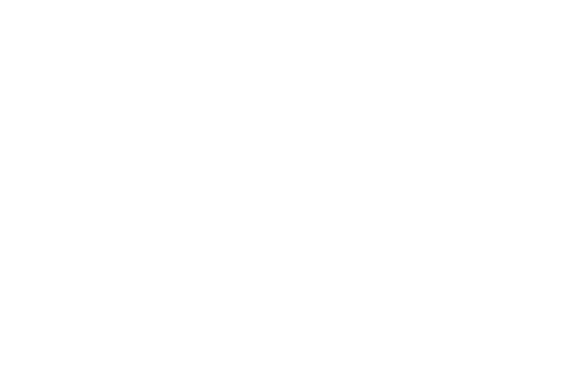

<IPython.core.display.Javascript object>


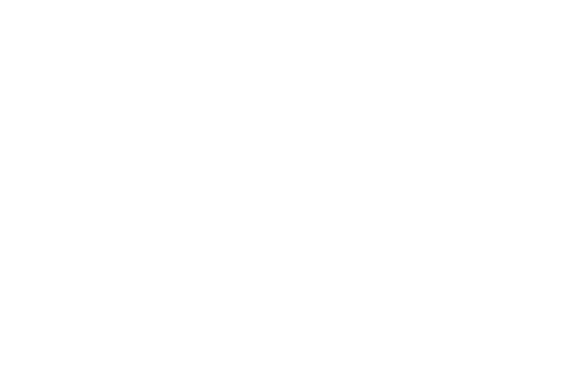

<IPython.core.display.Javascript object>


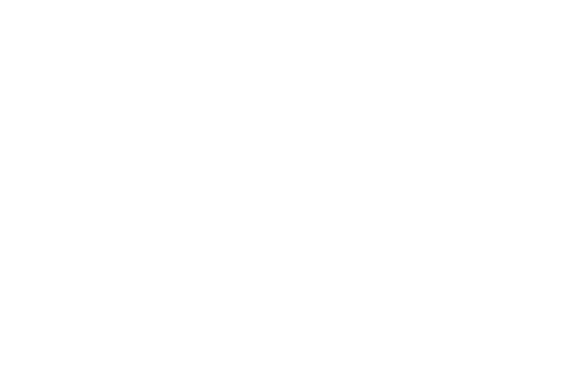

<IPython.core.display.Javascript object>


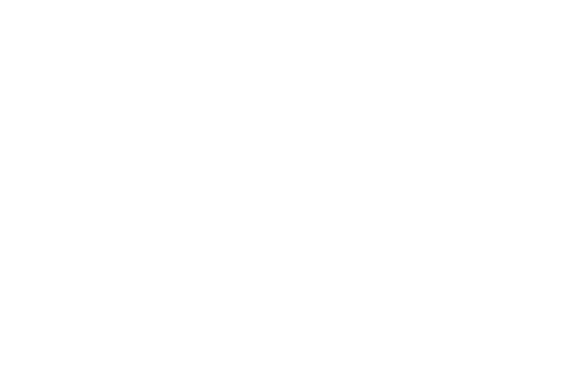

<IPython.core.display.Javascript object>


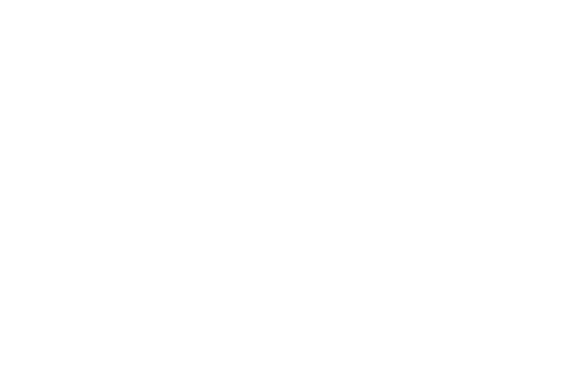

<IPython.core.display.Javascript object>


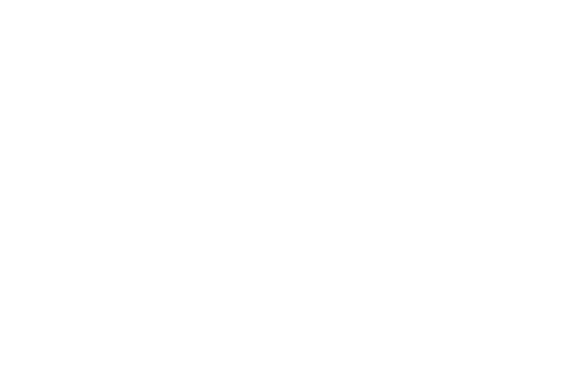

<IPython.core.display.Javascript object>


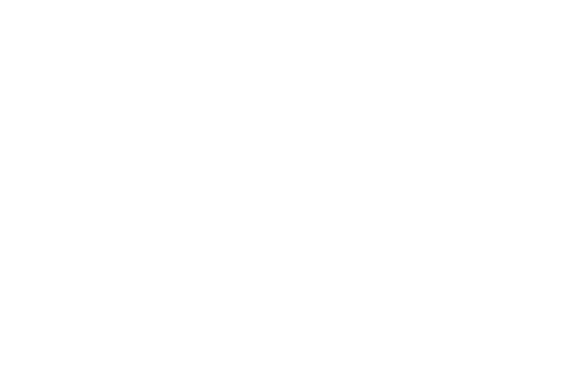

<IPython.core.display.Javascript object>


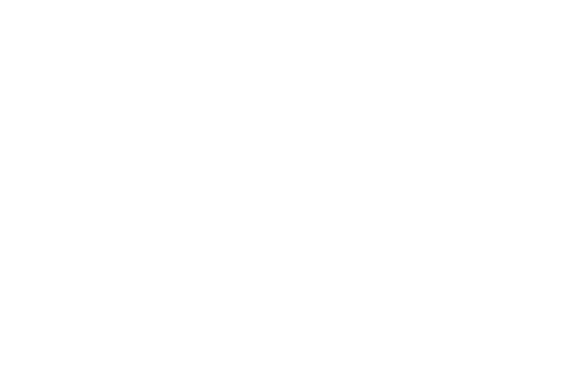

<IPython.core.display.Javascript object>


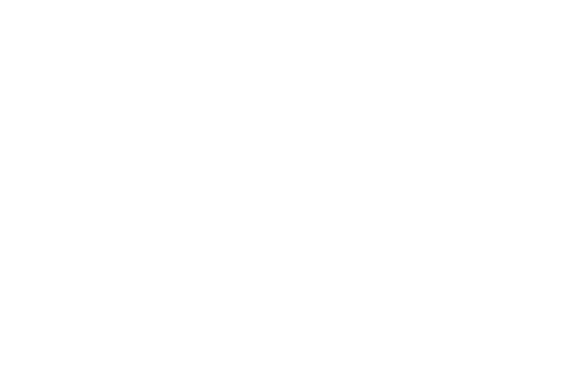

<IPython.core.display.Javascript object>


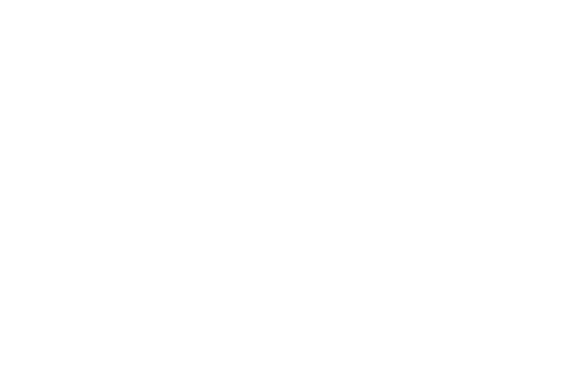

<IPython.core.display.Javascript object>


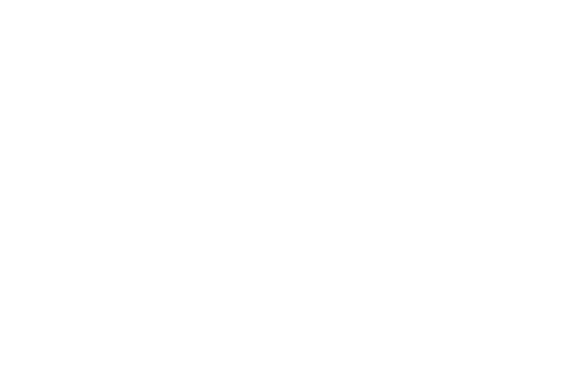

<IPython.core.display.Javascript object>


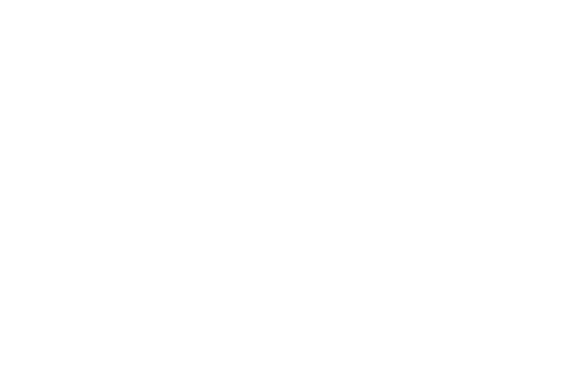

<IPython.core.display.Javascript object>


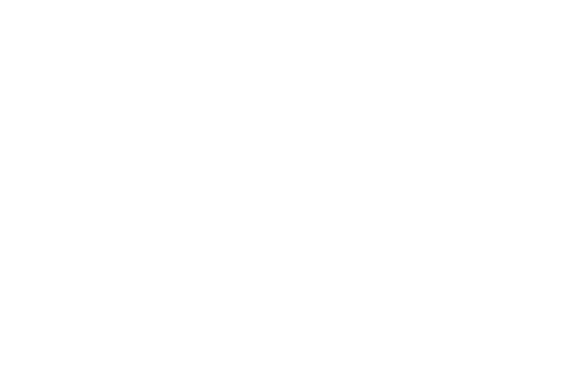

<IPython.core.display.Javascript object>


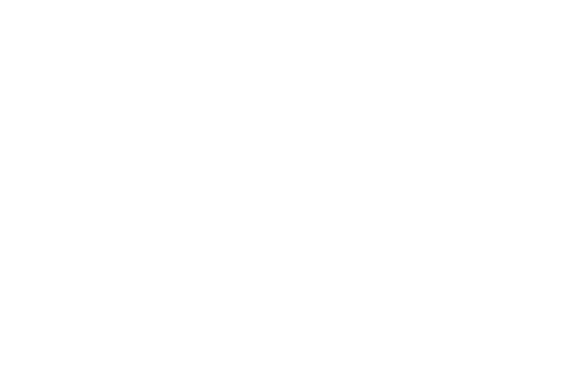

<IPython.core.display.Javascript object>


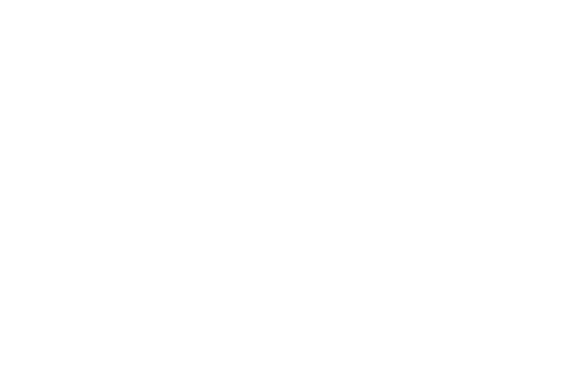

<IPython.core.display.Javascript object>


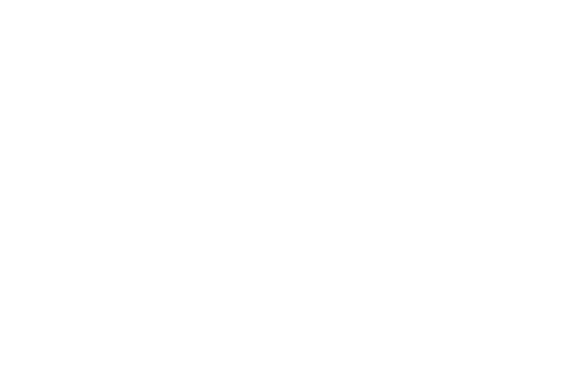

In [52]:
print('Short')
plots(results_dict, 5)

<IPython.core.display.Javascript object>


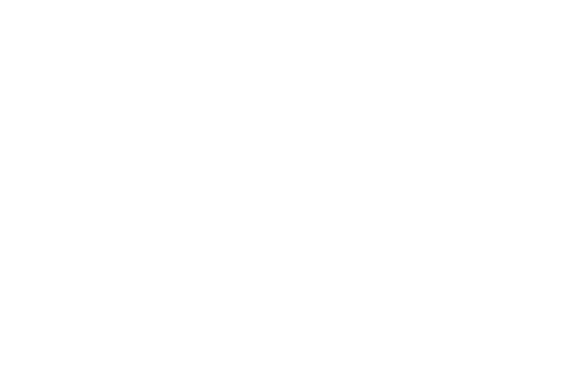

<IPython.core.display.Javascript object>


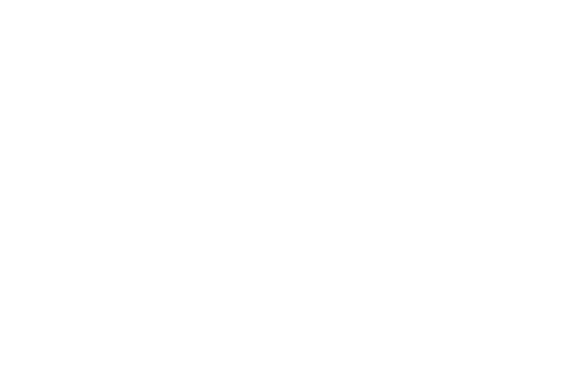

Text(0.5, 1.0, 'Average skill Score of short correlation')

<IPython.core.display.Javascript object>


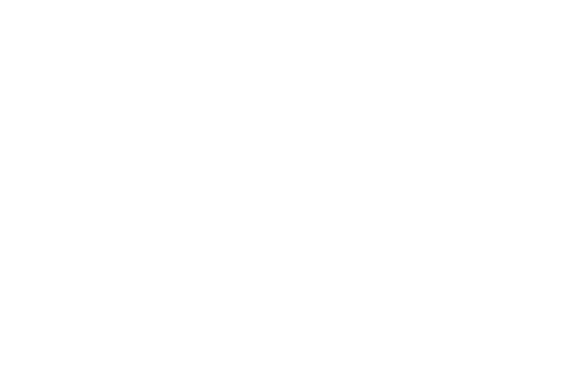

<IPython.core.display.Javascript object>


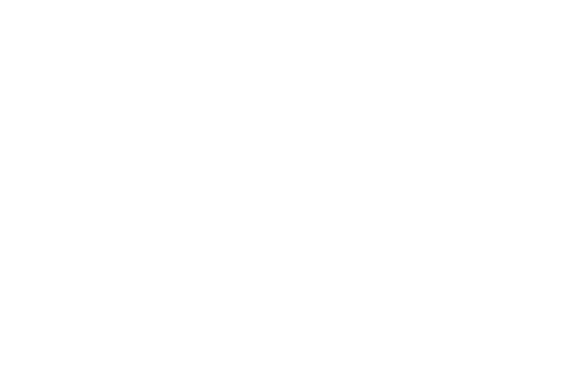

In [53]:
plt.figure()
plt.plot(1 - (rmse_l**2/rmse_full**2).mean(axis=0))
plt.xlabel('Number of assimilations')
plt.ylabel('Skill Score')
plt.title('Average skill Score of long correlation')


plt.figure()
plt.plot(1 - (rmse_s**2/rmse_full**2).mean(axis=0))
plt.xlabel('Number of assimilations')
plt.ylabel('Skill Score')
plt.title('Average skill Score of short correlation')

In [90]:
mu = np.zeros(dimension)
X_ens = assimilate.generate_ensemble(
    ens_size, mu, P_sqrt)
ground_truth = assimilate.generate_ensemble(
    init_size, mu, P_sqrt)
random_perts = np.einsum(
    'ij, jk... ->ik...', R_sqrt,
    np.random.randn(y_size, init_size, obs_size))
Y_ens = (H @ ground_truth)[:, :, None] + random_perts

NameError: name 'init_size' is not defined

In [ ]:
def plots_t(S, Tx, Tx_inv, Ty_inv, truth, X_ens,
            rmse, rmse_t, y=None, ii=-1):
    plt.figure()
    plt.plot(S @ Tx @ ground_truth, '--')
    plt.plot(S @ X_ens.mean(axis=1), '-')
    if y is not None:
        plt.scatter(np.arange(y_size), y, marker='.')
    plt.legend(['S @ x\'', 'S @ x\' ens mean', 'y\''])
    plt.title(
        f'In transformed space: {ii + 1}'
        + f'; rmse: {rmse_t:0.5}')


    plt.figure()
    plt.plot(ground_truth, '--')
    plt.plot(Tx_inv @ X_ens.mean(axis=1), '-')
    if y is not None:
        plt.scatter(np.arange(dimension)[::2],
                    Ty_inv @ y, marker='.')
    plt.legend(['x', 'x ens mean', 'y'])
    plt.title(f'In real space: {ii + 1}'
              + f'; rmse: {rmse:0.5}')

In [57]:
# X_ens_p = Tx @ X_ens
# Y_ens_p = Ty @ Y_ens

# X_ens_p_l = Tx_l @ X_ens
# Y_ens_p_l = Ty_l @ Y_ens

# X_ens_p_s = Tx_s @ X_ens
# Y_ens_p_s = Ty_s @ Y_ens

# Tranformed EnKF

It took:  0.005309466520945231


/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'RMSE')

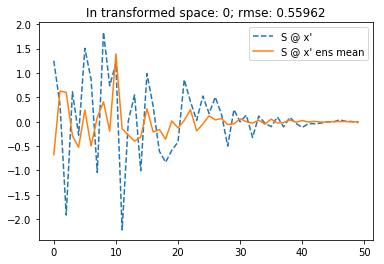

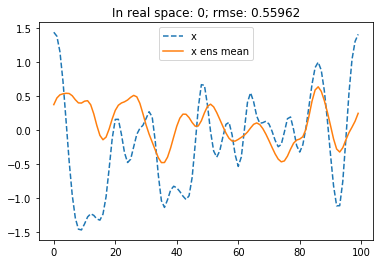

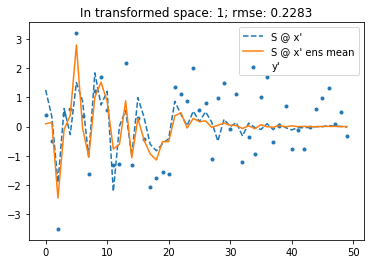

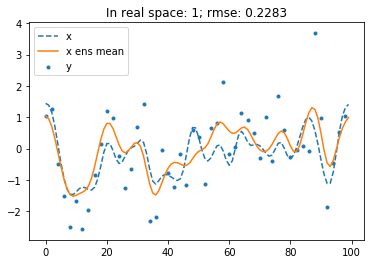

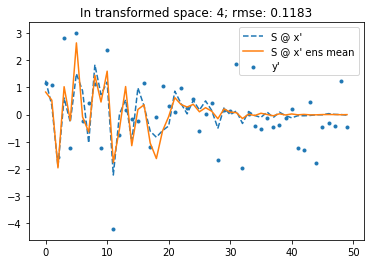

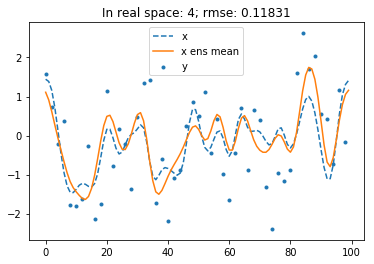

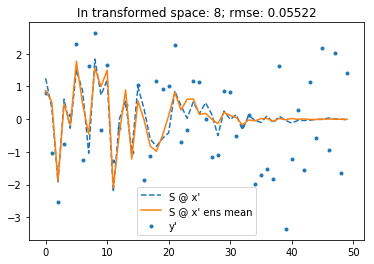

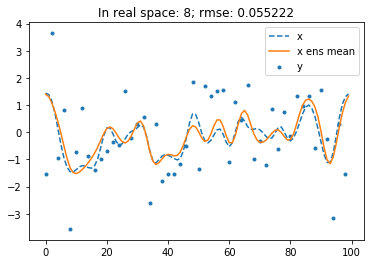

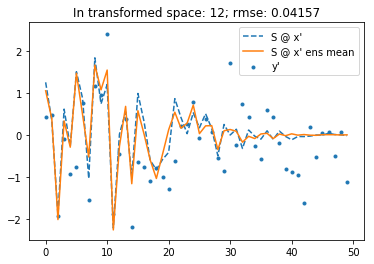

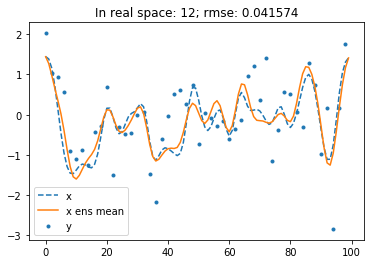

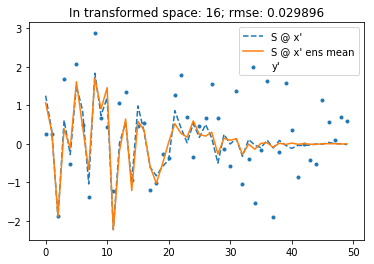

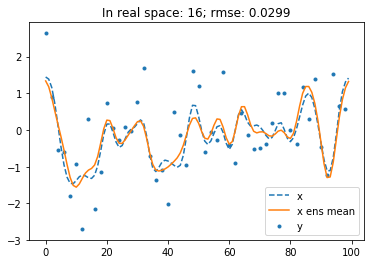

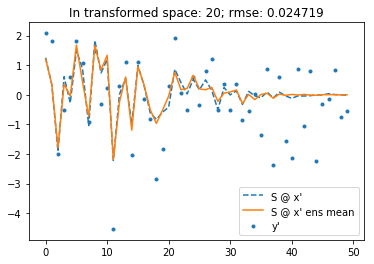

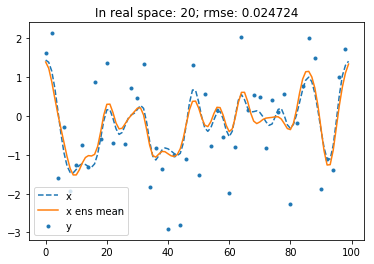

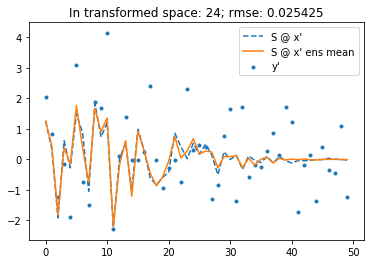

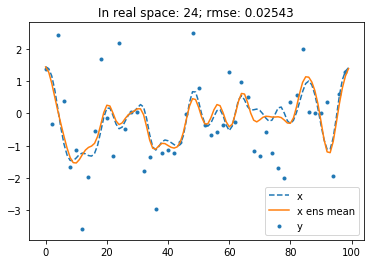

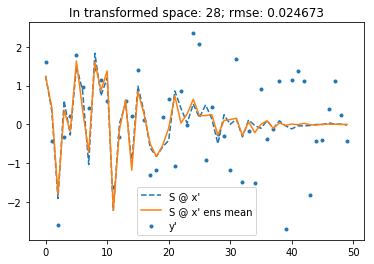

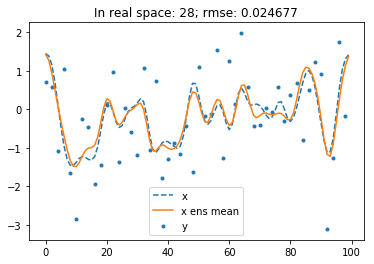

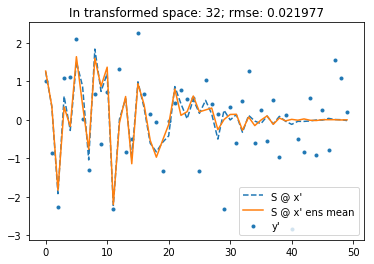

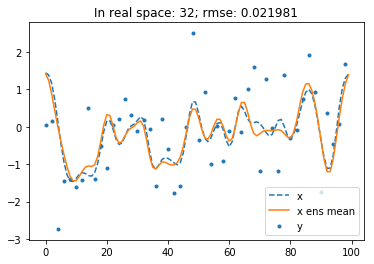

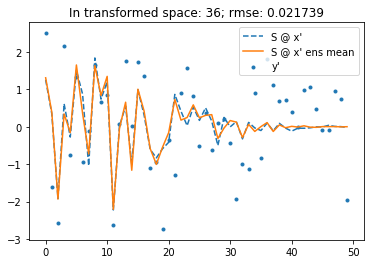

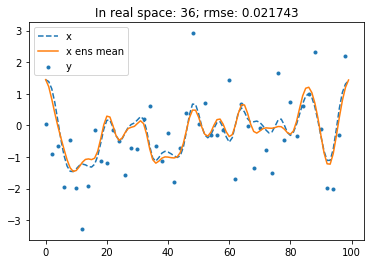

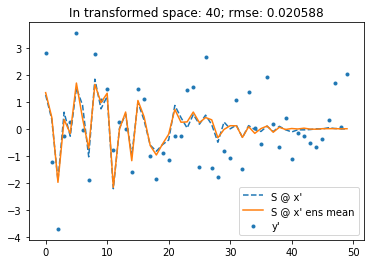

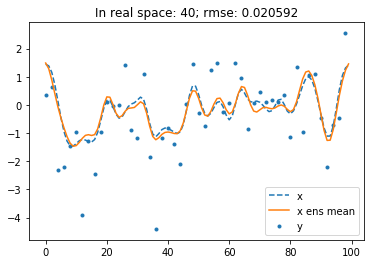

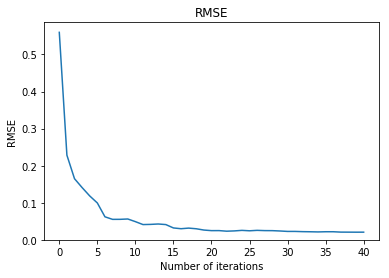

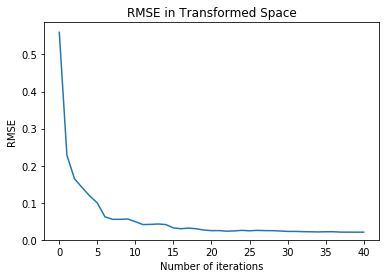

In [59]:
X_ens_kf = X_ens_p.copy()
S_kf_reduced = S.diagonal()[:, None]
P_kf_reduced = np.ones(y_size)[:, None]
I_reduced = np.ones(y_size)[:, None]

rmse = np.ones(iterations + 1)*np.nan
rmse_t = rmse.copy()
error = (ground_truth
         - Tx_inv @ X_ens_kf.mean(axis=1)[:, None])
error_t = (S @ Tx @ ground_truth
           - S @ X_ens_kf.mean(axis=1)[:, None])
rmse[0] = (error**2).mean()
rmse_t[0] = (error_t**2).mean()

plots_t(S, Tx, Tx_inv, Ty_inv,
      ground_truth, X_ens_kf, rmse[0], rmse_t[0])

time0 = time.time()
for ii in range(iterations):
    # mu_p = X_ens_kf.mean(axis=1)[:, None]
    Y_obs = (Y_ens_p[:, ii][:, None] 
             + U.T @ np.random.randn(y_size, ens_size))
    P_kf_reduced = np.var(X_ens_kf[:y_size], axis=1)[:, None]
    K = ((S_kf_reduced * P_kf_reduced)
        / (1 + S_kf_reduced**2 * P_kf_reduced))
    X_ens_kf[:y_size] = (X_ens_kf[:y_size]
                         + K * (Y_obs - S @ X_ens_kf))
    error = (ground_truth
             - Tx_inv @ X_ens_kf.mean(axis=1)[:, None])
    error_t = (S @ Tx @ ground_truth
               - S @ X_ens_kf.mean(axis=1)[:, None])
    rmse[ii + 1] = (error**2).mean()
    rmse_t[ii + 1] = (error_t**2).mean()
    if (ii + 1) % round(iterations/10) == 0 or ii + 1 == 1 :
        plots_t(S, Tx, Tx_inv, Ty_inv,
              ground_truth, X_ens_kf, rmse[ii + 1],
              rmse_t[ii + 1], y=Y_ens_p[:, ii], ii=ii)
time1 = time.time()
elapsed = (time1 - time0)/60
print('It took: ', elapsed)
plt.figure()
plt.plot(rmse)
plt.ylim([0, None])
plt.title('RMSE')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

plt.figure()
plt.plot(rmse_t)
plt.ylim([0, None])
plt.title('RMSE in Transformed Space')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

# Tranformed EnKF l only

It took:  0.00545039971669515


/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'RMSE')

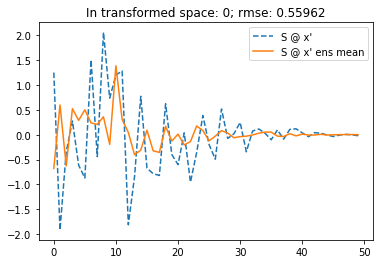

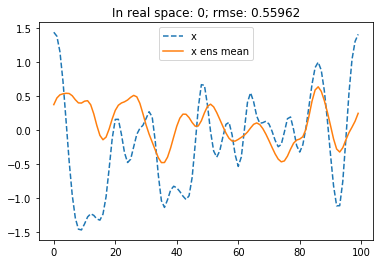

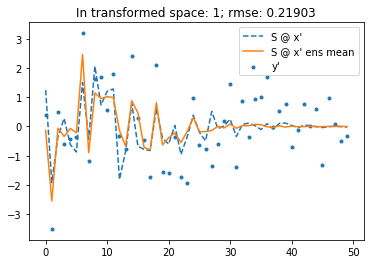

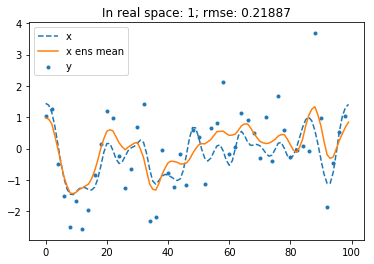

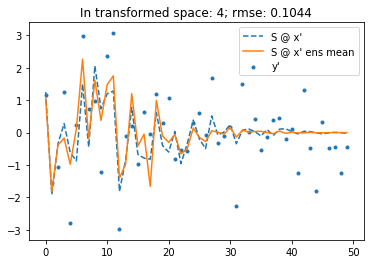

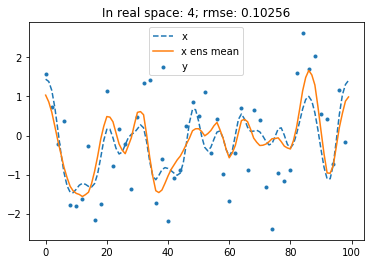

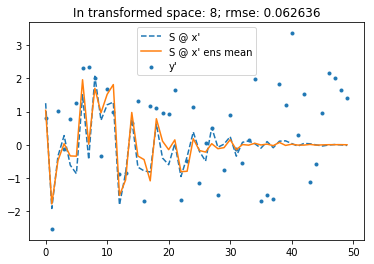

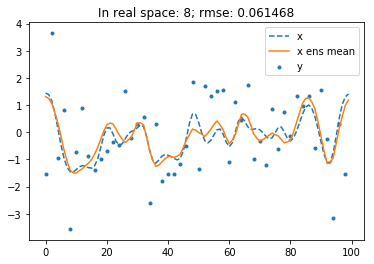

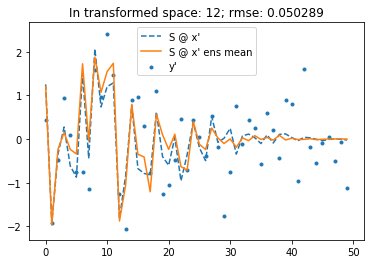

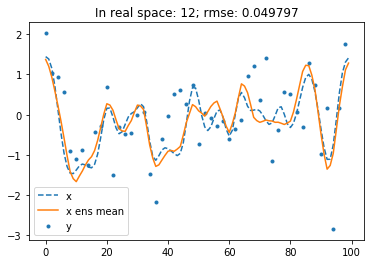

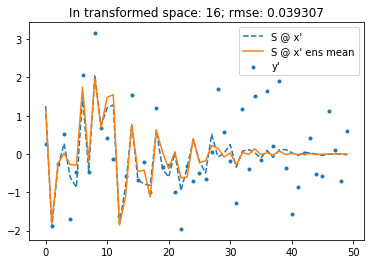

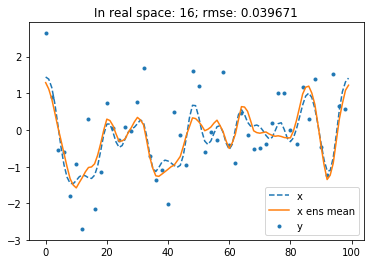

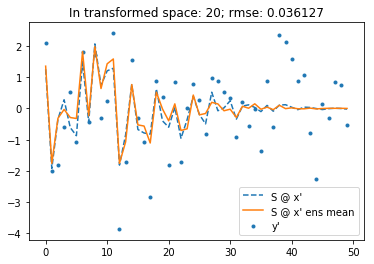

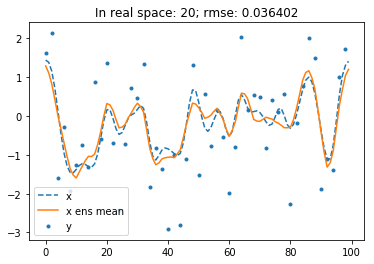

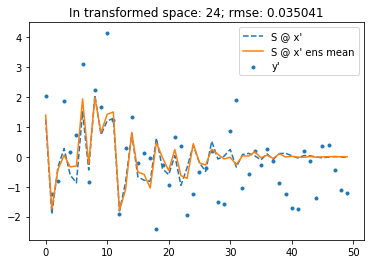

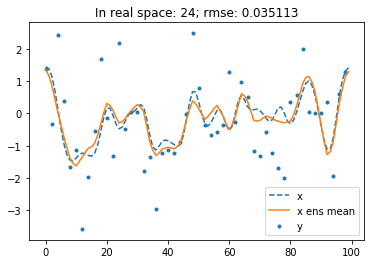

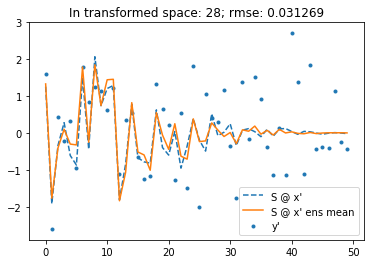

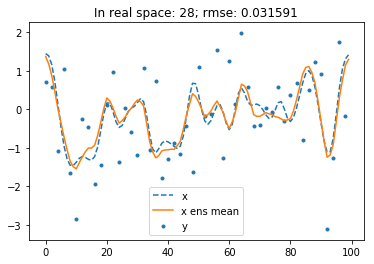

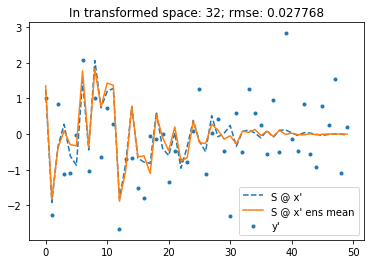

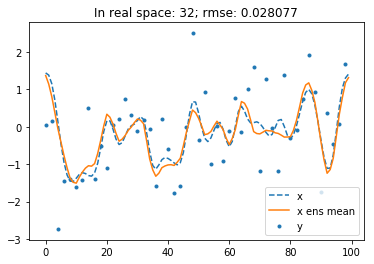

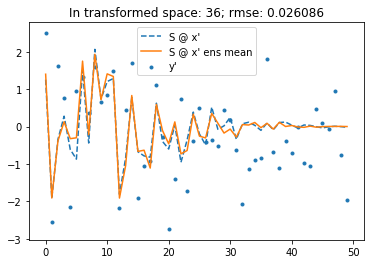

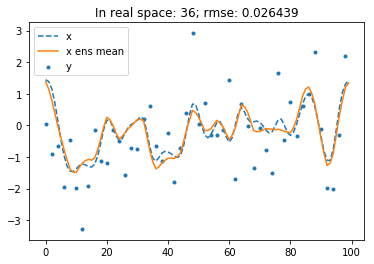

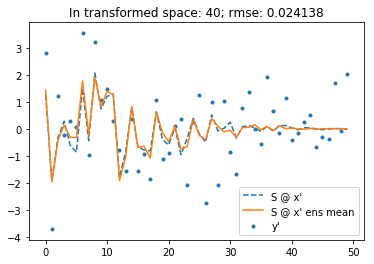

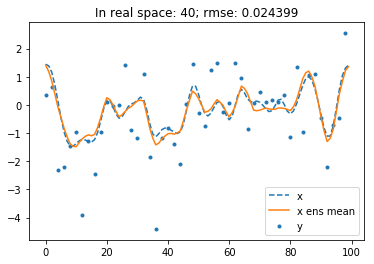

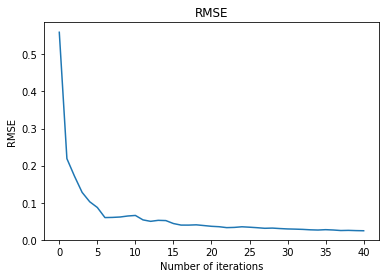

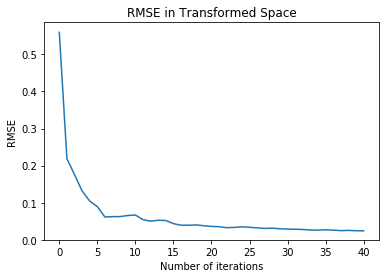

In [60]:
X_ens_kf = X_ens_p_l.copy()
Y_ens_kf = Y_ens_p_l.copy()
S_kf_reduced = S_l.diagonal()[:, None]
P_kf_reduced = np.ones(y_size)[:, None]
I_reduced = np.ones(y_size)[:, None]
Tx_kf = Tx_l.copy()
Ty_kf = Ty_l.copy()
Tx_inv_kf = Tx_inv_l.copy()
Ty_inv_kf = Ty_inv_l.copy()
S_kf = S_l.copy()
U_kf = U_l.copy()

rmse = np.ones(iterations + 1)*np.nan
rmse_t = rmse.copy()
error = (ground_truth
         - Tx_inv_kf @ X_ens_kf.mean(axis=1)[:, None])
error_t = (S_kf @ Tx_kf @ ground_truth
           - S_kf @ X_ens_kf.mean(axis=1)[:, None])
rmse[0] = (error**2).mean()
rmse_t[0] = (error_t**2).mean()

plots_t(S_kf, Tx_kf, Tx_inv_kf, Ty_inv_kf,
      ground_truth, X_ens_kf, rmse[0], rmse_t[0])

time0 = time.time()
for ii in range(iterations):
    # mu_p = X_ens_kf.mean(axis=1)[:, None]
    Y_obs = (Y_ens_kf[:, ii][:, None] 
             + U_kf.T @ np.random.randn(y_size, ens_size))
    P_kf_reduced = np.var(X_ens_kf[:y_size], axis=1)[:, None]
    K = ((S_kf_reduced * P_kf_reduced)
        / (1 + S_kf_reduced**2 * P_kf_reduced))
    X_ens_kf[:y_size] = (X_ens_kf[:y_size]
                         + K * (Y_obs - S_kf @ X_ens_kf))
    error = (ground_truth
             - Tx_inv_kf @ X_ens_kf.mean(axis=1)[:, None])
    error_t = (S_kf @ Tx_kf @ ground_truth
               - S_kf @ X_ens_kf.mean(axis=1)[:, None])
    rmse[ii + 1] = (error**2).mean()
    rmse_t[ii + 1] = (error_t**2).mean()
    if (ii + 1) % round(iterations/10) == 0 or ii + 1 == 1 :
        plots_t(S_kf, Tx_kf, Tx_inv_kf, Ty_inv_kf,
              ground_truth, X_ens_kf, rmse[ii + 1],
              rmse_t[ii + 1], y=Y_ens_kf[:, ii], ii=ii)
time1 = time.time()
elapsed = (time1 - time0)/60
print('It took: ', elapsed)
plt.figure()
plt.plot(rmse)
plt.ylim([0, None])
plt.title('RMSE')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

plt.figure()
plt.plot(rmse_t)
plt.ylim([0, None])
plt.title('RMSE in Transformed Space')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

# Tranformed EnKF s only

It took:  0.005613752206166585


/Users/harty/anaconda3/envs/multiloc/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Text(0,0.5,'RMSE')

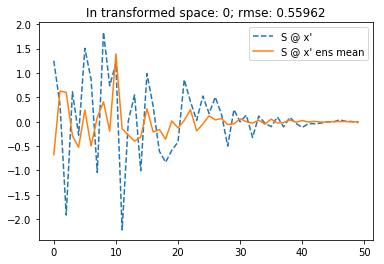

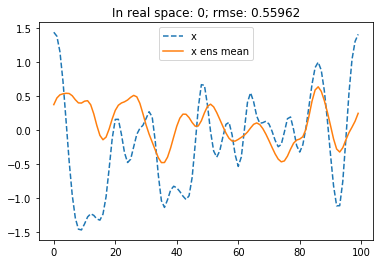

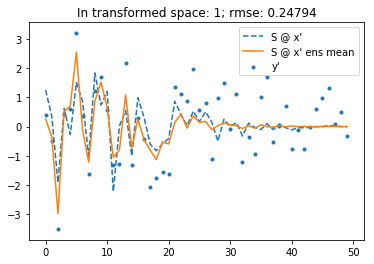

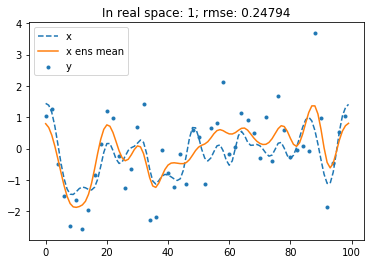

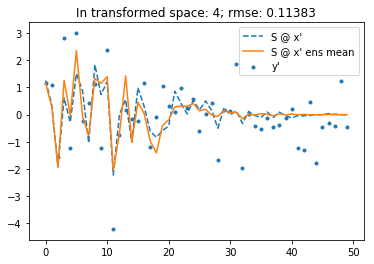

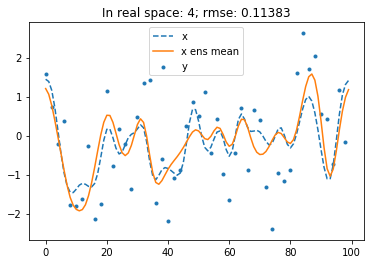

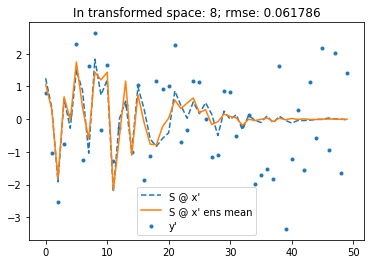

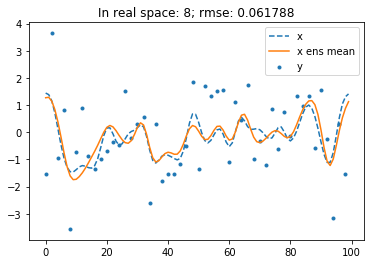

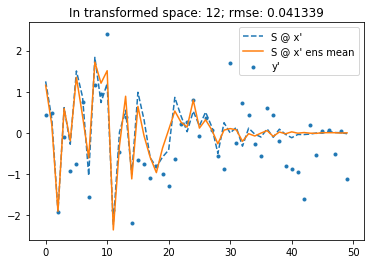

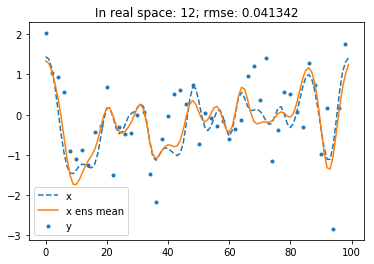

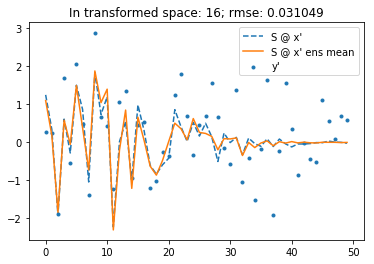

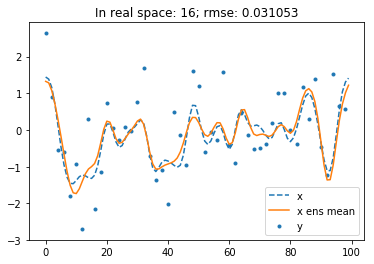

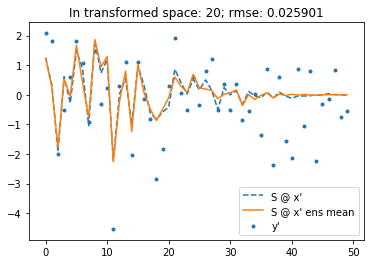

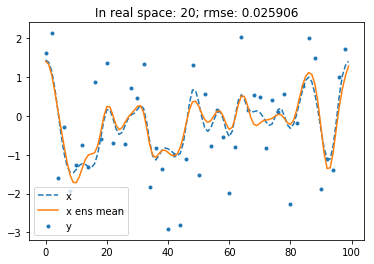

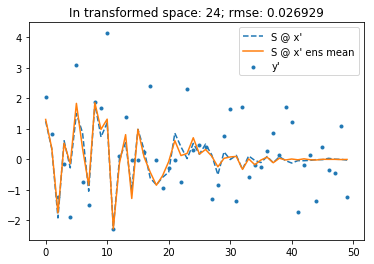

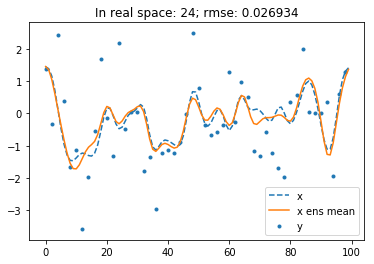

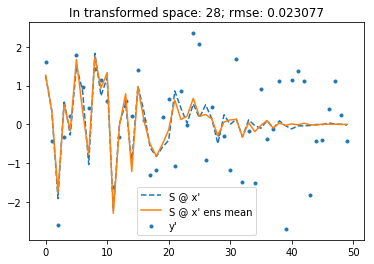

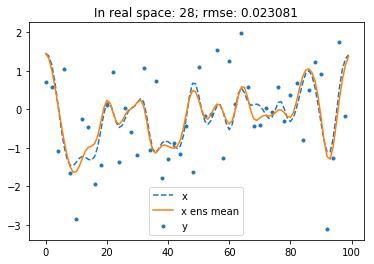

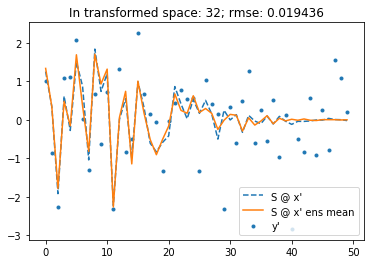

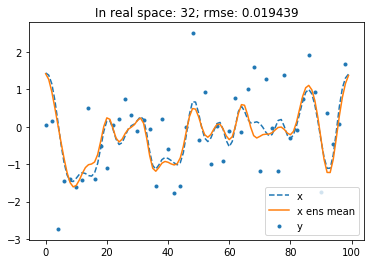

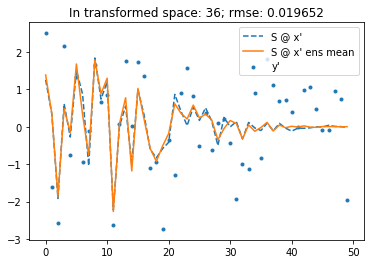

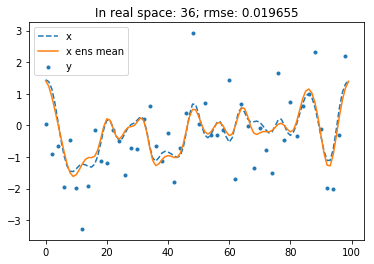

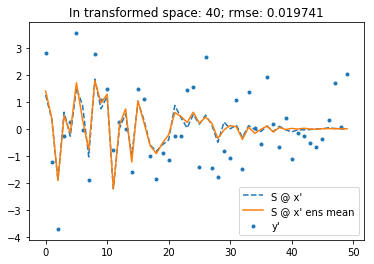

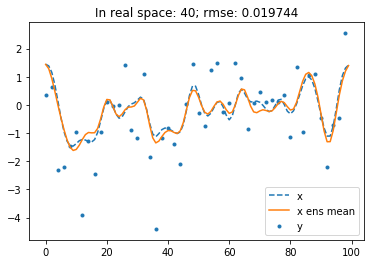

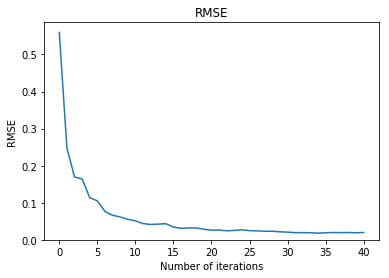

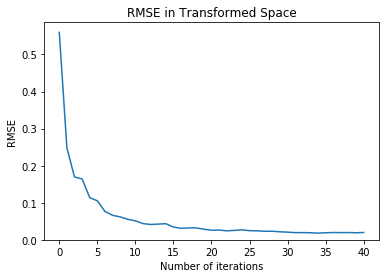

In [61]:
X_ens_kf = X_ens_p_s.copy()
Y_ens_kf = Y_ens_p_s.copy()
S_kf_reduced = S_s.diagonal()[:, None]
P_kf_reduced = np.ones(y_size)[:, None]
I_reduced = np.ones(y_size)[:, None]
Tx_kf = Tx_s.copy()
Ty_kf = Ty_s.copy()
Tx_inv_kf = Tx_inv_s.copy()
Ty_inv_kf = Ty_inv_s.copy()
S_kf = S_s.copy()
U_kf = U_s.copy()

rmse = np.ones(iterations + 1)*np.nan
rmse_t = rmse.copy()
error = (ground_truth
         - Tx_inv_kf @ X_ens_kf.mean(axis=1)[:, None])
error_t = (S_kf @ Tx_kf @ ground_truth
           - S_kf @ X_ens_kf.mean(axis=1)[:, None])
rmse[0] = (error**2).mean()
rmse_t[0] = (error_t**2).mean()

plots_t(S_kf, Tx_kf, Tx_inv_kf, Ty_inv_kf,
      ground_truth, X_ens_kf, rmse[0], rmse_t[0])

time0 = time.time()
for ii in range(iterations):
    # mu_p = X_ens_kf.mean(axis=1)[:, None]
    Y_obs = (Y_ens_kf[:, ii][:, None] 
             + U_kf.T @ np.random.randn(y_size, ens_size))
    P_kf_reduced = np.var(X_ens_kf[:y_size], axis=1)[:, None]
    K = ((S_kf_reduced * P_kf_reduced)
        / (1 + S_kf_reduced**2 * P_kf_reduced))
    X_ens_kf[:y_size] = (X_ens_kf[:y_size]
                         + K * (Y_obs - S_kf @ X_ens_kf))
    error = (ground_truth
             - Tx_inv_kf @ X_ens_kf.mean(axis=1)[:, None])
    error_t = (S_kf @ Tx_kf @ ground_truth
               - S_kf @ X_ens_kf.mean(axis=1)[:, None])
    rmse[ii + 1] = (error**2).mean()
    rmse_t[ii + 1] = (error_t**2).mean()
    if (ii + 1) % round(iterations/10) == 0 or ii + 1 == 1 :
        plots_t(S_kf, Tx_kf, Tx_inv_kf, Ty_inv_kf,
              ground_truth, X_ens_kf, rmse[ii + 1],
              rmse_t[ii + 1], y=Y_ens_kf[:, ii], ii=ii)
time1 = time.time()
elapsed = (time1 - time0)/60
print('It took: ', elapsed)
plt.figure()
plt.plot(rmse)
plt.ylim([0, None])
plt.title('RMSE')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')

plt.figure()
plt.plot(rmse_t)
plt.ylim([0, None])
plt.title('RMSE in Transformed Space')
plt.xlabel('Number of iterations')
plt.ylabel('RMSE')